In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql3

sns.set(style="darkgrid")
ROOT_PATH="C:/Users/moshe/Documents/projectML/p1"
DATA_PATH = "%s/data/raw" % ROOT_PATH
DB_FILE = "%s/hairsalon.db" % DATA_PATH
def readSQL(query):
    import pandas as pd
    import sqlite3 as sql3
    db = sql3.connect(DB_FILE)
    df = pd.read_sql_query(query, db)
    db.close()
    return(df)

Retrieving data from superbooking table

In [71]:
superbooking=readSQL("""select * from superbooking""")
superbooking['clientdate']=superbooking['client']+superbooking['date']
nbappts=len(superbooking)
superbooking.columns

Index(['client', 'staff', 'service', 'date', 'time', 'timeint', 'description',
       'category', 'noshowflag', 'canceldate',
       ...
       'x4_BECKY', 'x4_HOUSE', 'x4_JJ', 'x4_JOANNE', 'x4_KELLY', 'x4_NA',
       'x4_SINEAD', 'x4_TANYA', 'visit', 'clientdate'],
      dtype='object', length=182)

In [75]:
allcolumns=superbooking.columns
columnstoremove=['client', 'staff', 'service','newcustomer',
                'date', 'time', 'timeint', 'description','category',
                'canceldate', 'canceledby',
                'latecancellation', 'tdate', 'month', 'ttime',
                'firstdate','firstdate2',  'lastnoshowdate',
       'lastnoshowhour', 'lastnoshowdayinweek', 'lastvisitdate',
       'lastvisithour', 'laststaff', 'lastvisitdayinweek', 'lastservice',
       'lastcategory',  'dayhourcombi', 'dayhourcount',
       'daycount', 'hourday', 'lastvisitdayhourcombi','lastnoshowdayhourcombi','clientdate'
       'lastnoshowdayhourcombi', 'svcamt', 'lastsvcamt', 'svckey',
       'lastsvckey', 'lastservice2', 'lastcategory2', 'laststaff2','visit','clientdate']
predictorlist = [x for x in allcolumns if x not in columnstoremove]
booking=superbooking[predictorlist].copy()
dftmp=booking.columns.to_frame()
filepath = "C:/Users/moshe/Documents/projectML/p1/data/interim/columnsfinaldf.xlsx"
dftmp.to_excel(filepath, index=False)
filepath = "C:/Users/moshe/Documents/projectML/p1/data/interim/bookingdescribe.xlsx"
booking.describe().to_excel(filepath)
filepath = "C:/Users/moshe/Documents/projectML/p1/data/interim/df.xlsx"
booking.to_excel(filepath)

In [76]:
#unique values
print(['unique values deltadaysappt',len(booking.deltadaysappt.value_counts())
      ,'deltadayslastnoshow',len(booking.deltadayslastnoshow.value_counts())
      ,'last60dvisit',len(booking.last60dvisit.value_counts())
,'last60dnoshow',len(booking.last60dnoshow.value_counts())
,'last60dbillamt',len(booking.last60dbillamt.value_counts())
,'last60drefundamt',len(booking.last60drefundamt.value_counts())
,'last60dcolor',len(booking.last60dcolor.value_counts())
,'last60dstyle',len(booking.last60dstyle.value_counts())
,'last60dproduct',len(booking.last60dproduct.value_counts())
,'last60dlatecancel',len(booking.last60dlatecancel.value_counts())
,'last60dregcancel',len(booking.last60dregcancel.value_counts())
,'svcavg',len(booking.svcavg.value_counts())
,'lastsvcavg',len(booking.lastsvcavg.value_counts())       
      ])

['unique values deltadaysappt', 97, 'deltadayslastnoshow', 77, 'last60dvisit', 12, 'last60dnoshow', 5, 'last60dbillamt', 210, 'last60drefundamt', 7, 'last60dcolor', 28, 'last60dstyle', 124, 'last60dproduct', 35, 'last60dlatecancel', 3, 'last60dregcancel', 4, 'svcavg', 28, 'lastsvcavg', 18]


In [23]:
#superbooking[['visit','firstapp','newcustomer','existingcustomer','noshowflag','multipleappt','latecancellation']].describe()

<h2>various statistics

In [77]:
nbcustomers=len(superbooking['client'].unique())
avgapptday=len(superbooking)/len(superbooking['clientdate'].unique())
a,b,c=superbooking['noshowflag'].sum(),superbooking['latecancellation'].sum(),superbooking['visit'].sum()
print(['distinct customers',nbcustomers,'nb appts',c,'total noshows',a,'total late cancellations',b,a-b,((a-b)/a),(b/a)],avgapptday)

['distinct customers', 800, 'nb appts', 1799, 'total noshows', 144, 'total late cancellations', 84, 60, 0.4166666666666667, 0.5833333333333334] 1.1621447028423773


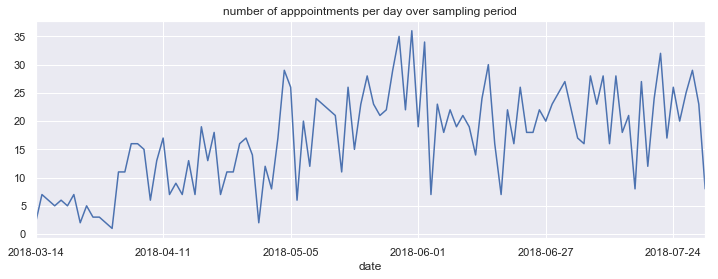

In [78]:
df=superbooking.copy()
df2=df.set_index(df['date'])
plt.figure(figsize=(12,4))
plt.title("number of apppointments per day over sampling period")
df2['visit'].groupby(['date']).sum().plot.line()

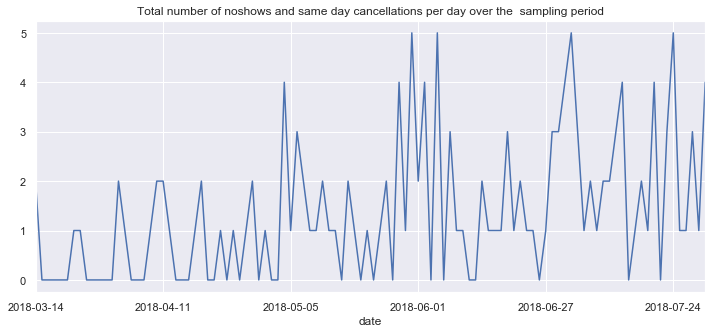

In [79]:
plt.figure(figsize=(12,5))
plt.title("Total number of noshows and same day cancellations per day over the  sampling period")
df2['noshowflag'].groupby(['date']).sum().plot()

In [80]:
df=readSQL("""select month,count(visit)/count(distinct date) avgapptsperday from superbooking group by month""")
df

month  avgapptsperday
0      3               4
1      4              11
2      5              21
3      6              20
4      7              21

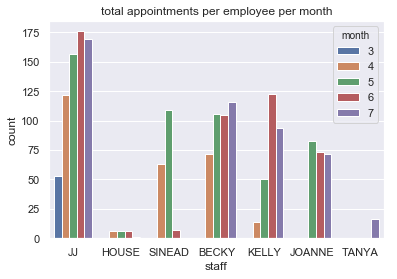

In [81]:
df=superbooking.copy()
plt.title("total appointments per employee per month")
ax = sns.countplot(x="staff",hue="month",data=df2)

Number of one time customers /recurring customers

In [82]:
query="""select client,count(distinct date) visit from superbooking
group by client having count(distinct date) = 1 order by visit desc"""
dfone=readSQL(query)
nbonetime=len(dfone)
nbonetime

458

In [83]:
superone=pd.merge(superbooking,dfone['client'],on='client',how='inner')
superone[['visit','firstapp','newcustomer','noshowflag','multipleappt','latecancellation']].describe()
superone['clientdate']=superone['client']+superone['date']
len(superone)

520

In [84]:
len(superone['clientdate'].unique())

458

In [85]:
avgapptday=len(superone)/len(superone['clientdate'].unique())
a,b,c=superone['noshowflag'].sum(),superone['latecancellation'].sum(),superone['visit'].sum()
print([nbonetime,c,a,b,a-b,((a-b)/a),(b/a),avgapptday])

[458, 520, 35, 19, 16, 0.45714285714285713, 0.5428571428571428, 1.1353711790393013]


In [86]:
query="""select client,count(distinct date) visit from superbooking
group by client having count(distinct date) > 1 order by visit desc"""
dfmulti=readSQL(query)
nbmulti=len(dfmulti)
supermulti=pd.merge(superbooking,dfmulti['client'],on='client',how='inner')
supermulti['clientdate']=supermulti['client']+supermulti['date']
supermulti[['visit','firstapp','newcustomer','noshowflag','multipleappt','latecancellation']].describe()

visit     firstapp  newcustomer   noshowflag  multipleappt  \
count  1279.0  1279.000000  1279.000000  1279.000000   1279.000000   
mean      1.0     0.311181     0.311181     0.085223      0.250977   
std       0.0     0.463158     0.463158     0.279322      0.433745   
min       1.0     0.000000     0.000000     0.000000      0.000000   
25%       1.0     0.000000     0.000000     0.000000      0.000000   
50%       1.0     0.000000     0.000000     0.000000      0.000000   
75%       1.0     1.000000     1.000000     0.000000      1.000000   
max       1.0     1.000000     1.000000     1.000000      1.000000   

       latecancellation  
count       1279.000000  
mean           0.050821  
std            0.219718  
min            0.000000  
25%            0.000000  
50%            0.000000  
75%            0.000000  
max            1.000000

In [87]:
avgapptday=len(supermulti)/len(supermulti['clientdate'].unique())
a,b,c=supermulti['noshowflag'].sum(),supermulti['latecancellation'].sum(),supermulti['visit'].sum()
print([nbmulti,c,a,b,a-b,((a-b)/a),(b/a),avgapptday])

[342, 1279, 109, 65, 44, 0.4036697247706422, 0.5963302752293578, 1.1733944954128441]


<h2> number of customers having multiple effective visits done in studied period

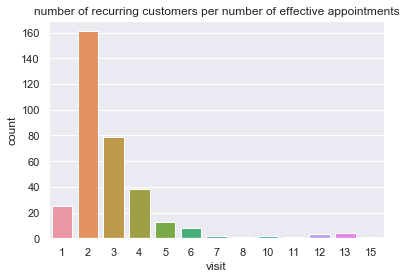

In [88]:
query="""select client, count(distinct date) visit from  superbooking where client in (select client from superbooking
group by client having count(distinct date) > 1) and noshowflag=0  group by client"""
df=readSQL(query)
plt.title("number of recurring customers per number of effective appointments")
ax = sns.countplot(x="visit",data=df)

number of average effective visits per recurring customer

In [89]:
df.mean()

visit    2.973373
dtype: float64

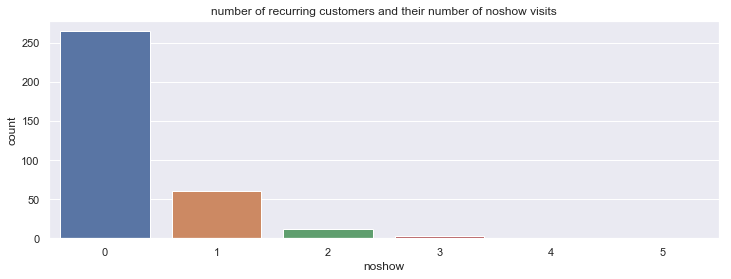

In [90]:
plt.figure(figsize=(12,4))
query="""select client, count(distinct date) noshow from superbooking where client in (select client from superbooking
group by client having count(distinct date) > 1) and noshowflag=1 group by client
union select client, 0 noshow from superbooking where client in (select client from superbooking
group by client having count(distinct date) > 1 and  SUM(noshowflag)=0)"""
df=readSQL(query)
plt.title("number of recurring customers and their number of noshow visits")
ax = sns.countplot(x="noshow",data=df)

In [91]:
print(['average number of noshows/customer',df.mean()])

['average number of noshows/customer', noshow    0.298246
dtype: float64]


In [92]:
print(['customer with one no show ',(df[df['noshow']==1].count())/(df.count()),
      'customer with two no show at least',(df[df['noshow']>=2].count())/(df.count())])

['customer with one no show ', client    0.175439
noshow    0.175439
dtype: float64, 'customer with two no show at least', client    0.049708
noshow    0.049708
dtype: float64]


Distribution deltadays between 2 effective appointments 

In [107]:
df=supermulti.copy()
df=df.loc[(df.deltadaysappt != 0)  & (df.noshowflag==0) ,:]
df2=df.groupby('clientdate')
df3=df2.first()[['deltadaysappt']]
df3.describe()

deltadaysappt
count     667.000000
mean       32.416792
std        21.879349
min         1.000000
25%        14.000000
50%        31.000000
75%        43.000000
max       133.000000

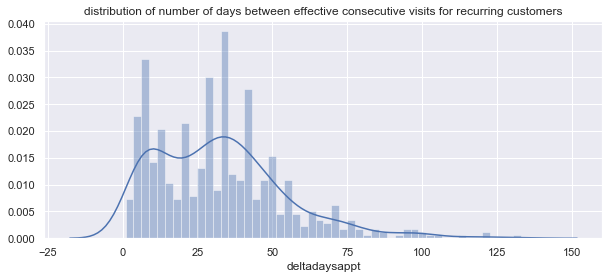

In [111]:
plt.figure(figsize=(10,4))
plt.title("distribution of number of days between effective consecutive visits for recurring customers")
ax=sns.distplot(df3.deltadaysappt,norm_hist=True,bins=50)

In [95]:
df3.deltadaysappt.mean()

32.416791604197904

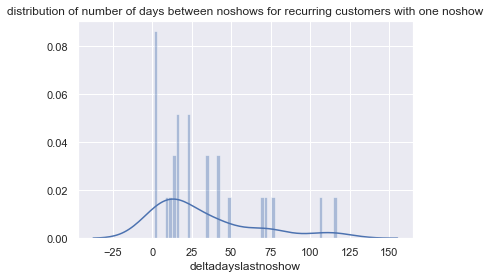

In [96]:
df=supermulti.copy()
df=df.loc[(df.deltadayslastnoshow!=0) & (df.noshowflag==1),:]
df2=df.groupby('clientdate')
df3=df2.first()[['deltadayslastnoshow']]
plt.title("distribution of number of days between noshows for recurring customers with one noshow")
ax=sns.distplot(df3.deltadayslastnoshow,norm_hist=True,bins=50)

The average number days between two noshows

In [97]:
df3.mean()

deltadayslastnoshow    32.56
dtype: float64

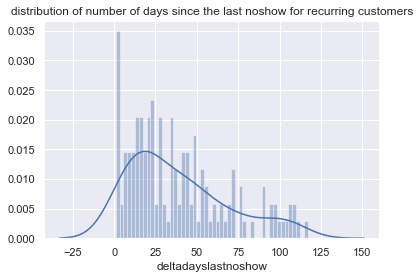

In [98]:
df=supermulti.copy()
df=df.loc[(df.deltadayslastnoshow!=0),:]
df2=df.groupby('clientdate')
df3=df2.first()[['deltadayslastnoshow']]
plt.title("distribution of number of days since the last noshow for recurring customers")
ax=sns.distplot(df3.deltadayslastnoshow,norm_hist=True,bins=50)

In [99]:
#first appointment 7% noshows
df=superbooking.copy()
df=df.loc[(df.firstapp==1),:]
df.describe()

timeint  noshowflag  latecancellation   dayinweek       month  \
count   883.000000  917.000000        917.000000  917.000000  917.000000   
mean    823.510759    0.070883          0.037077    3.128680    5.163577   
std     170.588273    0.256770          0.189055    1.503568    1.138577   
min     480.000000    0.000000          0.000000    1.000000    3.000000   
25%     675.000000    0.000000          0.000000    2.000000    4.000000   
50%     830.000000    0.000000          0.000000    3.000000    5.000000   
75%     960.000000    0.000000          0.000000    4.000000    6.000000   
max    1170.000000    1.000000          1.000000    6.000000    7.000000   

             hour  firstapp  newcustomer  existingcustomer  deltadaysappt  \
count  883.000000     917.0   917.000000             917.0          917.0   
mean    13.453001       1.0     0.938931               0.0            0.0   
std      2.812105       0.0     0.239587               0.0            0.0   
min      8.000000       1.0     0.000000               0.0            0.0   
25%     11.000000       1.0     1.000000               0.0            0.0   
50%     13.000000       1.0     1.000000               0.0            0.0   
75%     16.000000       1.0     1.000000               0.0            0.0   
max     19.000000       1.0     1.000000               0.0            0.0   

       ...    x3_TANYA  x4_BECKY  x4_HOUSE  x4_JJ  x4_JOANNE  x4_KELLY  x4_NA  \
count  ...  917.000000     917.0     917.0  917.0      917.0     917.0  917.0   
mean   ...    0.011996       0.0       0.0    0.0        0.0       0.0    1.0   
std    ...    0.108925       0.0       0.0    0.0        0.0       0.0    0.0   
min    ...    0.000000       0.0       0.0    0.0        0.0       0.0    1.0   
25%    ...    0.000000       0.0       0.0    0.0        0.0       0.0    1.0   
50%    ...    0.000000       0.0       0.0    0.0        0.0       0.0    1.0   
75%    ...    0.000000       0.0       0.0    0.0        0.0       0.0    1.0   
max    ...    1.000000       0.0       0.0    0.0        0.0       0.0    1.0   

       x4_SINEAD  x4_TANYA  visit  
count      917.0     917.0  917.0  
mean         0.0       0.0    1.0  
std          0.0       0.0    0.0  
min          0.0       0.0    1.0  
25%          0.0       0.0    1.0  
50%          0.0       0.0    1.0  
75%          0.0       0.0    1.0  
max          0.0       0.0    1.0  

[8 rows x 157 columns]

In [100]:
#following appointments 9% noshows
df=superbooking.copy()
df=df.loc[(df.firstapp==0),:]
df.describe()

timeint  noshowflag  latecancellation   dayinweek       month  \
count   832.000000  882.000000        882.000000  882.000000  882.000000   
mean    798.461538    0.089569          0.056689    3.153061    6.012472   
std     174.899768    0.285726          0.231379    1.460932    0.913304   
min     480.000000    0.000000          0.000000    1.000000    4.000000   
25%     660.000000    0.000000          0.000000    2.000000    5.000000   
50%     780.000000    0.000000          0.000000    3.000000    6.000000   
75%     950.000000    0.000000          0.000000    4.000000    7.000000   
max    1160.000000    1.000000          1.000000    6.000000    7.000000   

             hour  firstapp  newcustomer  existingcustomer  deltadaysappt  \
count  832.000000     882.0   882.000000        882.000000     882.000000   
mean    13.043269       0.0     0.029478          0.961451      30.819728   
std      2.906990       0.0     0.169239          0.192626      22.255261   
min      8.000000       0.0     0.000000          0.000000       0.000000   
25%     11.000000       0.0     0.000000          1.000000      13.000000   
50%     13.000000       0.0     0.000000          1.000000      28.500000   
75%     15.000000       0.0     0.000000          1.000000      42.750000   
max     19.000000       0.0     1.000000          1.000000     133.000000   

       ...    x3_TANYA    x4_BECKY    x4_HOUSE       x4_JJ   x4_JOANNE  \
count  ...  882.000000  882.000000  882.000000  882.000000  882.000000   
mean   ...    0.005669    0.234694    0.009070    0.417234    0.100907   
std    ...    0.075121    0.424048    0.094859    0.493382    0.301376   
min    ...    0.000000    0.000000    0.000000    0.000000    0.000000   
25%    ...    0.000000    0.000000    0.000000    0.000000    0.000000   
50%    ...    0.000000    0.000000    0.000000    0.000000    0.000000   
75%    ...    0.000000    0.000000    0.000000    1.000000    0.000000   
max    ...    1.000000    1.000000    1.000000    1.000000    1.000000   

         x4_KELLY       x4_NA   x4_SINEAD    x4_TANYA  visit  
count  882.000000  882.000000  882.000000  882.000000  882.0  
mean     0.060091    0.039683    0.137188    0.001134    1.0  
std      0.237790    0.195323    0.344241    0.033672    0.0  
min      0.000000    0.000000    0.000000    0.000000    1.0  
25%      0.000000    0.000000    0.000000    0.000000    1.0  
50%      0.000000    0.000000    0.000000    0.000000    1.0  
75%      0.000000    0.000000    0.000000    0.000000    1.0  
max      1.000000    1.000000    1.000000    1.000000    1.0  

[8 rows x 157 columns]

<h2> Explore data

In [101]:
import pyMechkar as mechkar

Directory  report  already exists
Directory  report  already exists


C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume t

C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume t

C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume t

C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume t

C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume t

C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume t

C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume t

C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume t

C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume t

C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume t

C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume t

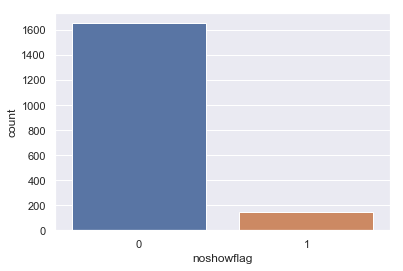

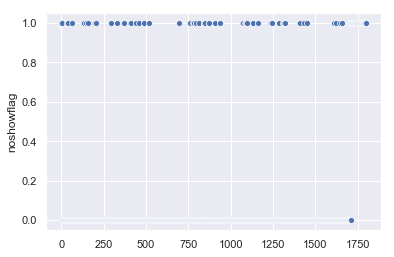

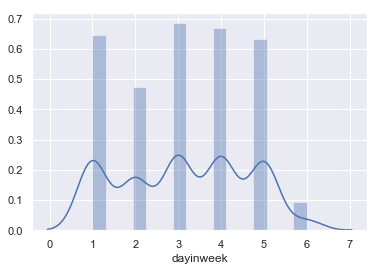

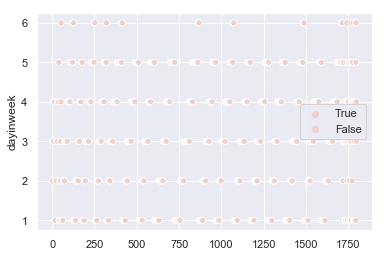

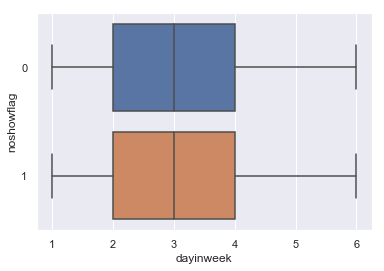

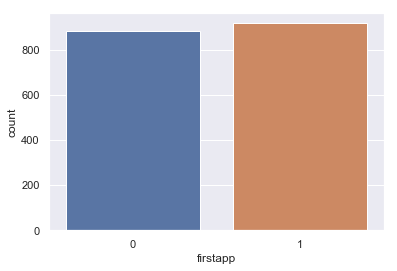

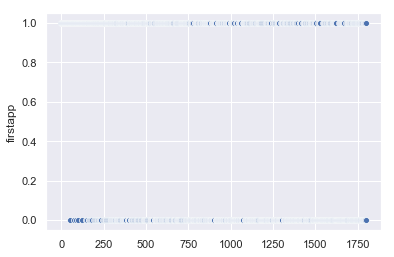

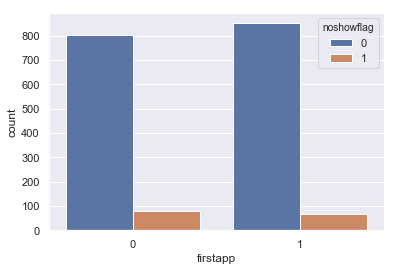

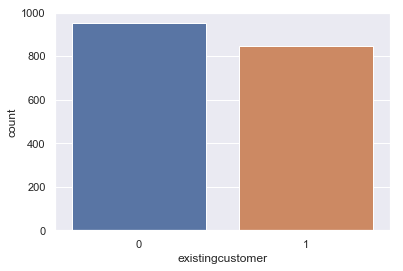

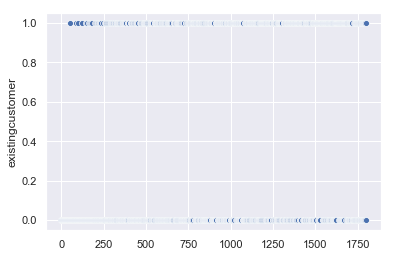

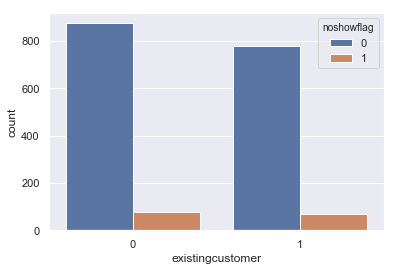

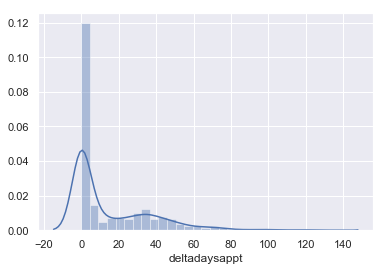

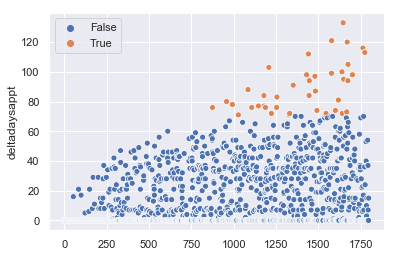

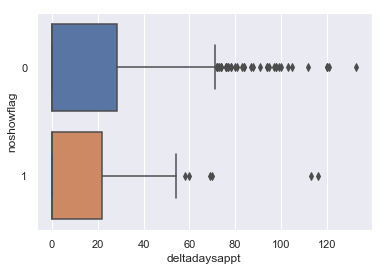

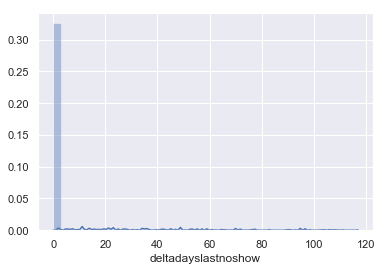

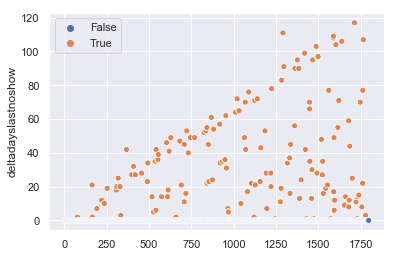

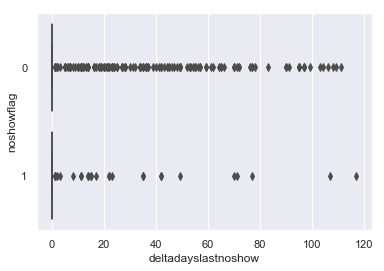

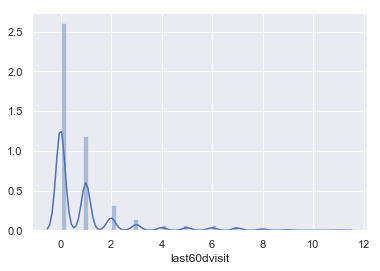

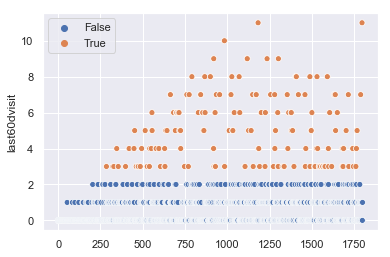

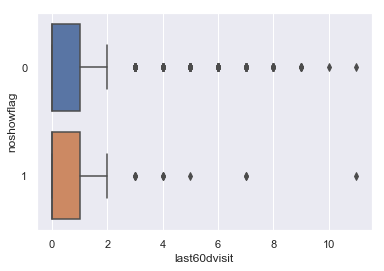

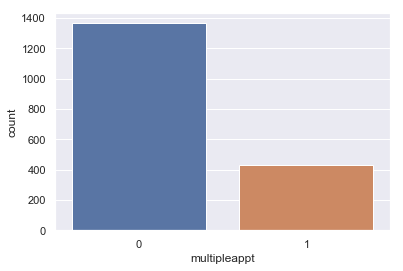

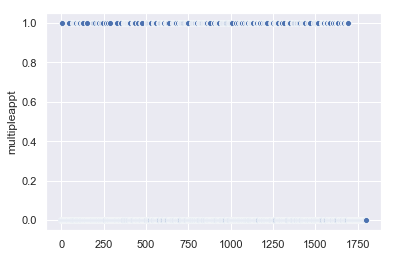

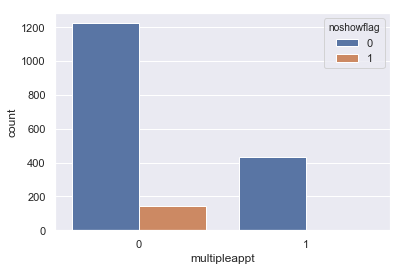

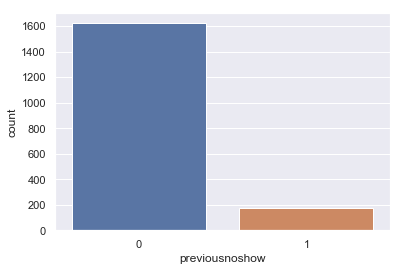

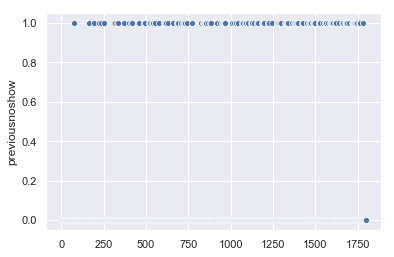

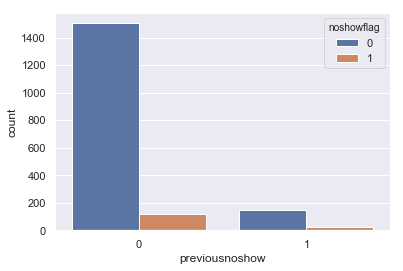

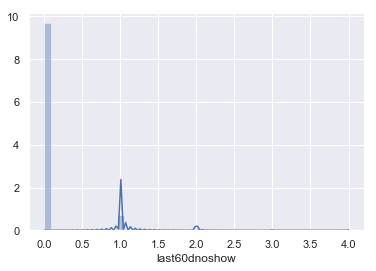

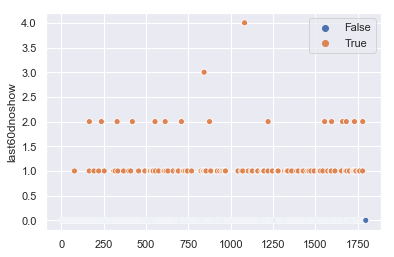

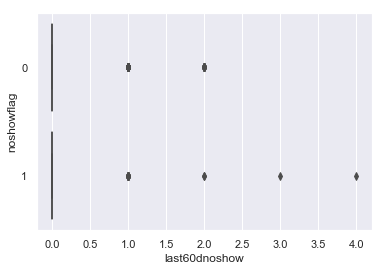

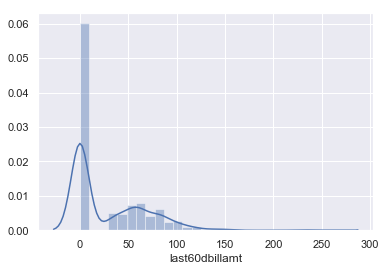

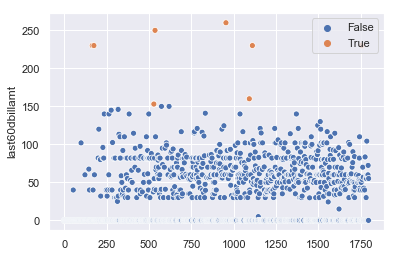

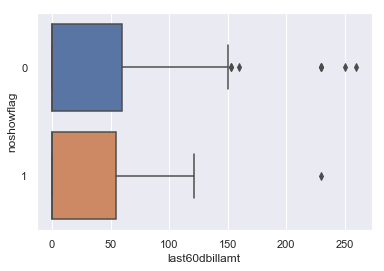

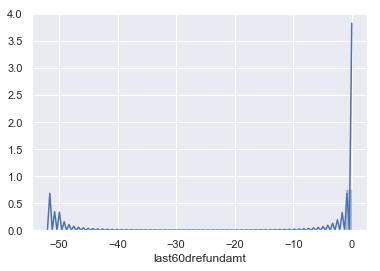

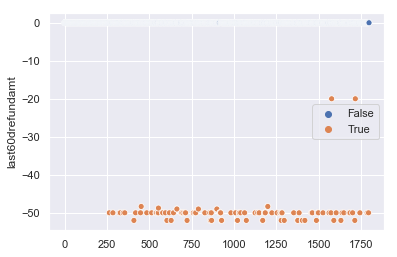

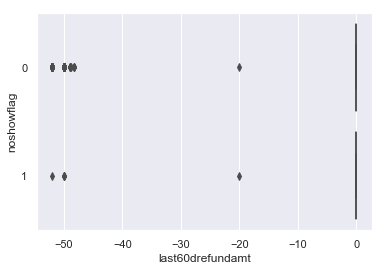

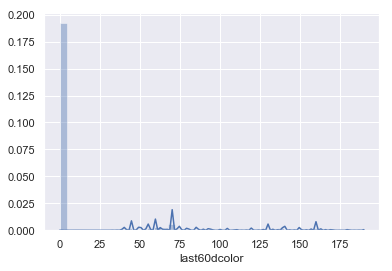

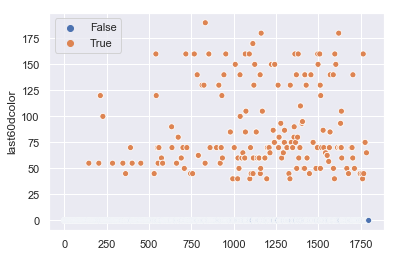

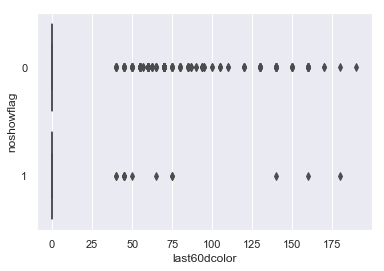

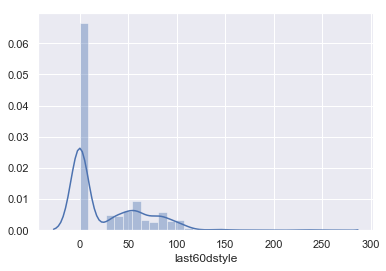

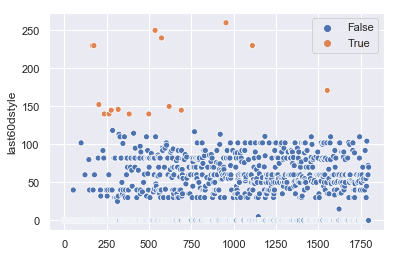

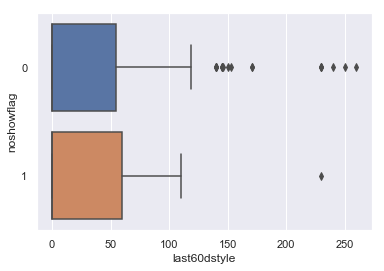

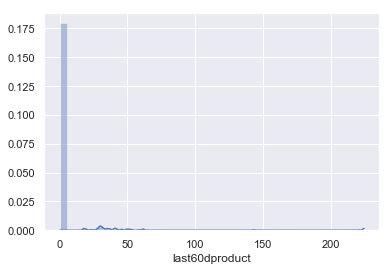

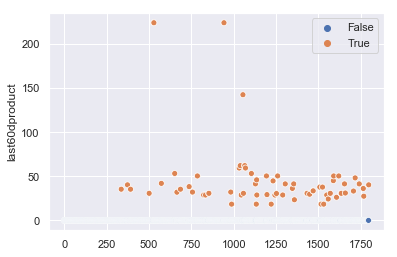

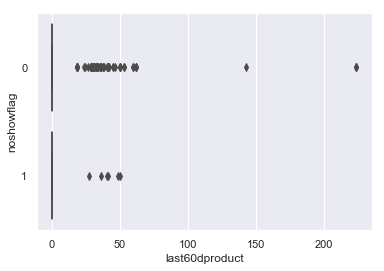

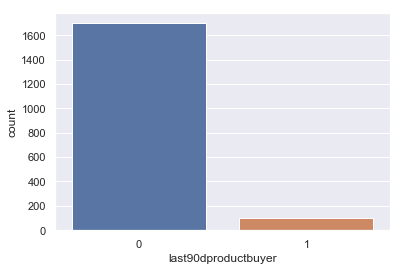

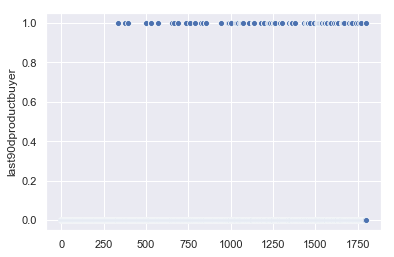

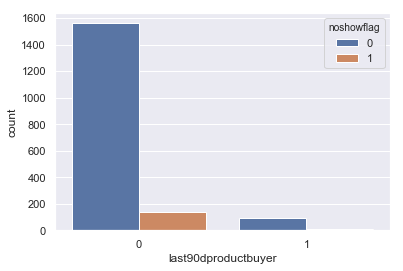

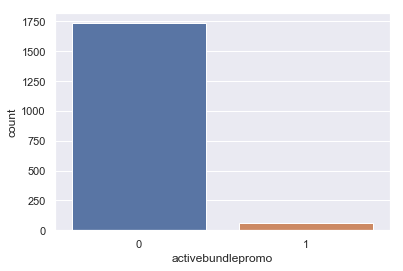

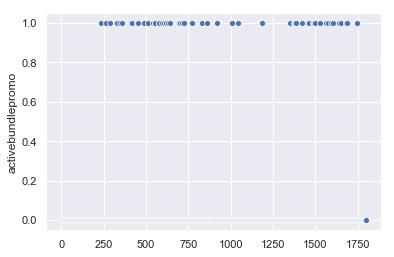

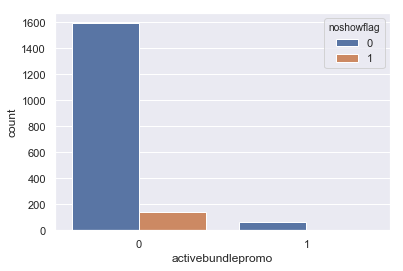

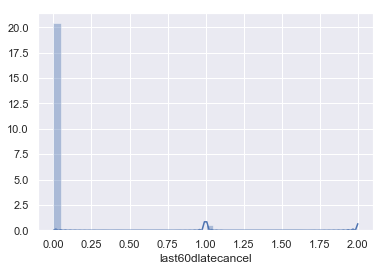

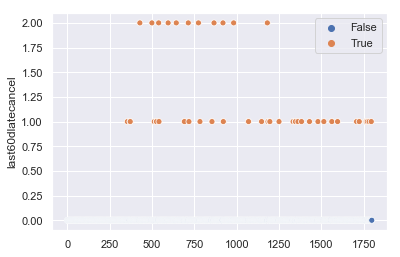

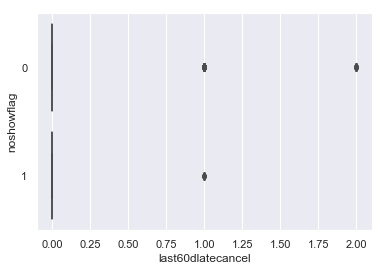

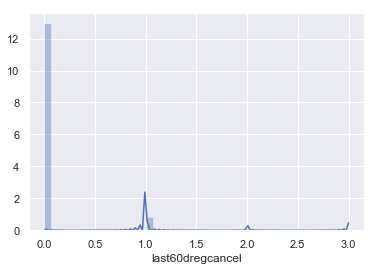

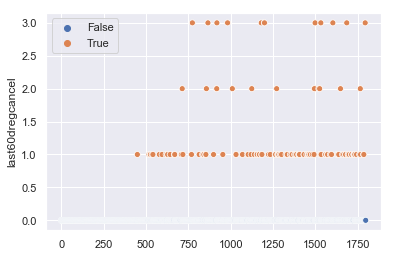

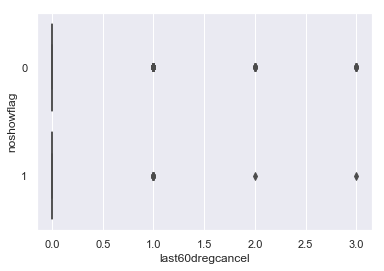

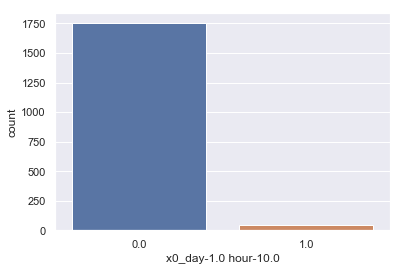

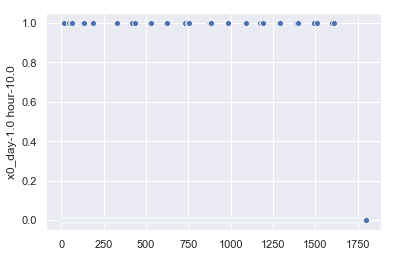

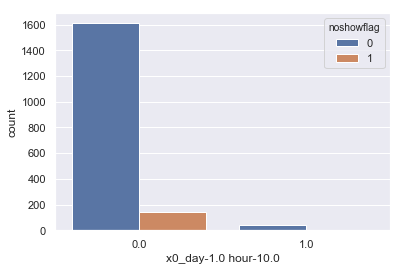

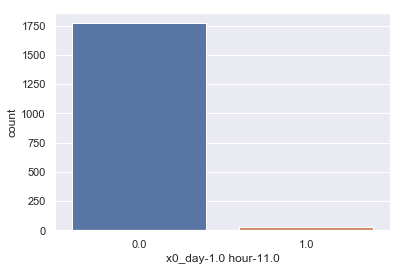

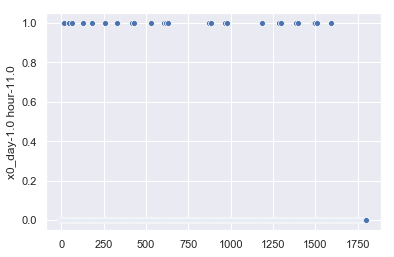

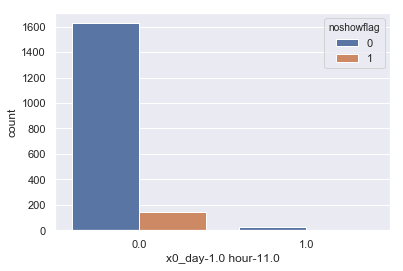

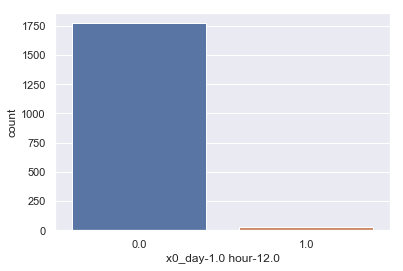

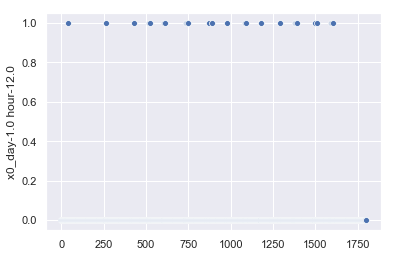

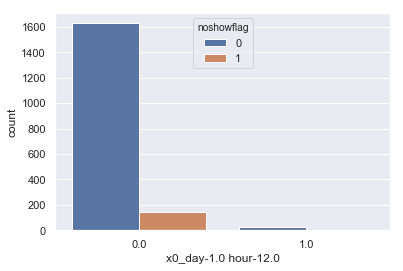

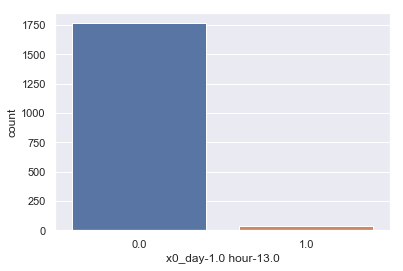

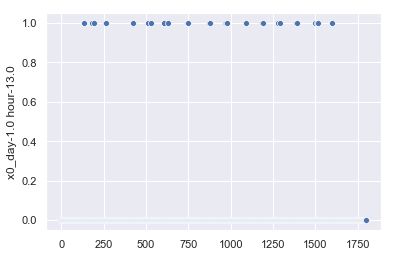

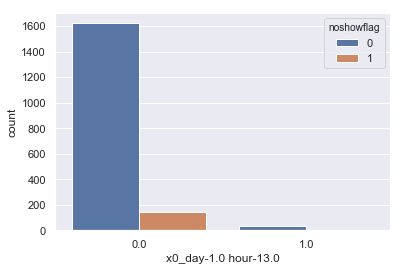

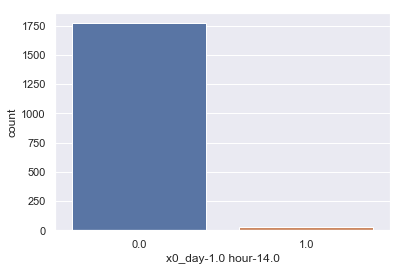

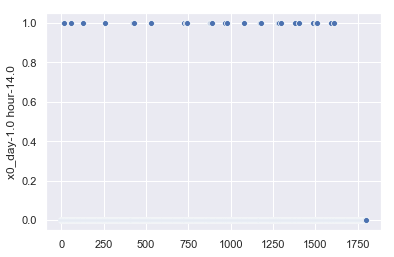

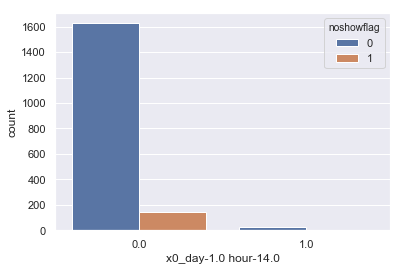

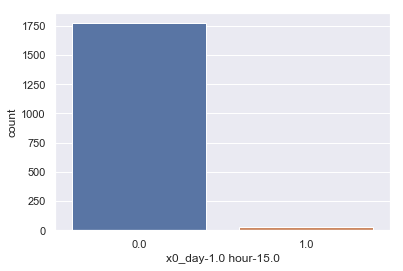

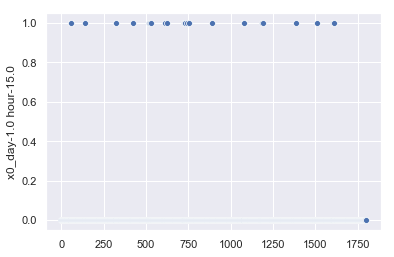

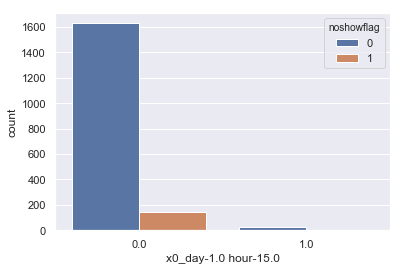

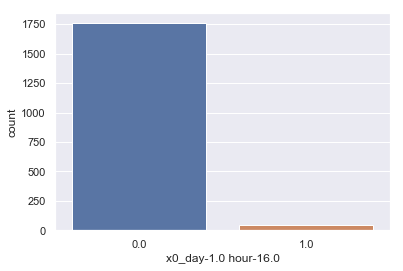

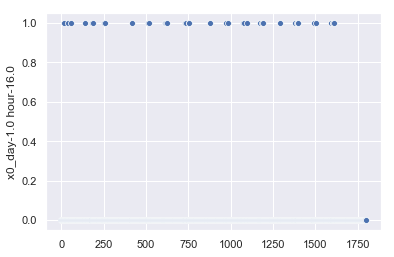

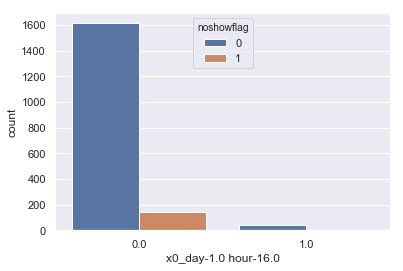

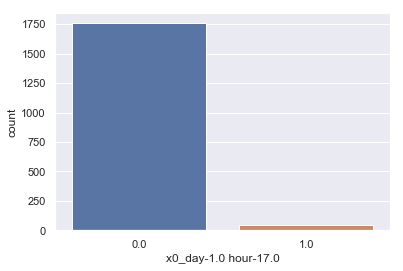

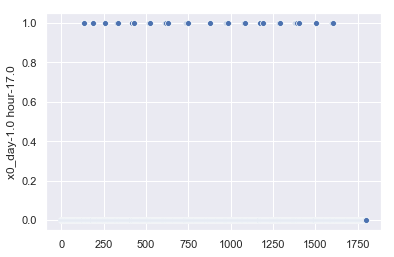

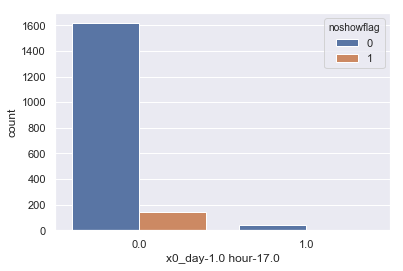

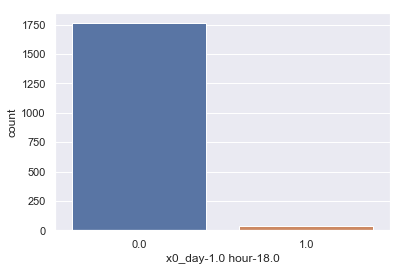

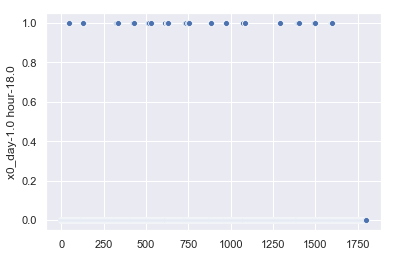

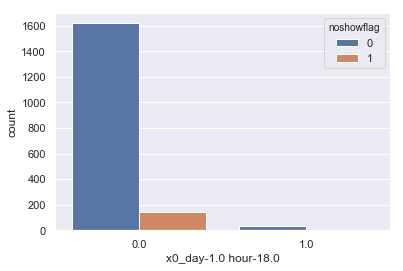

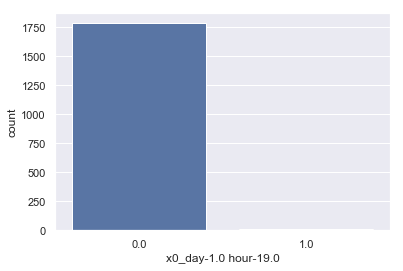

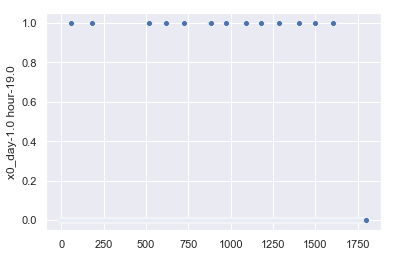

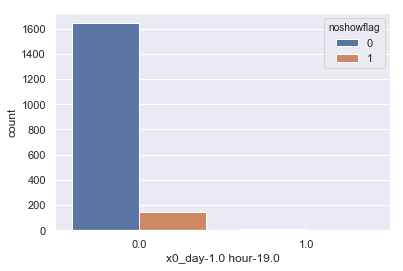

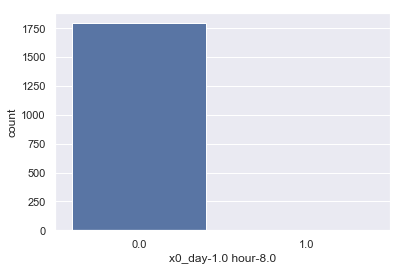

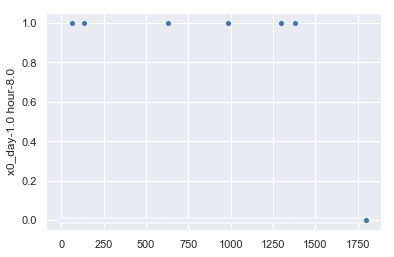

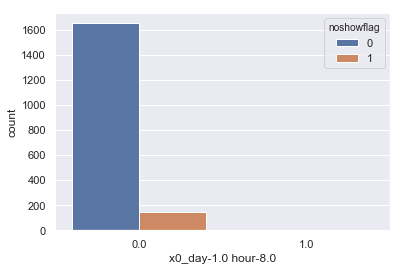

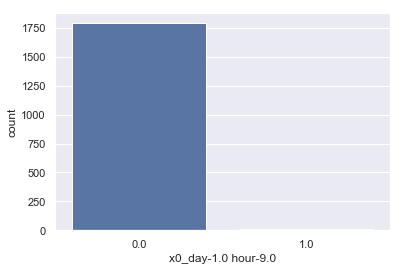

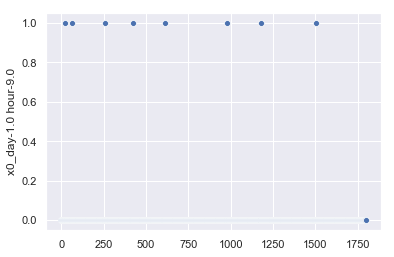

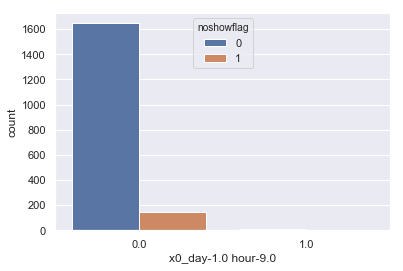

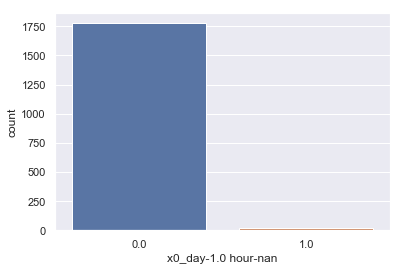

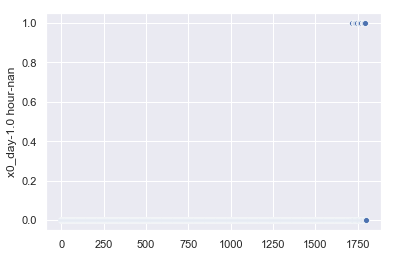

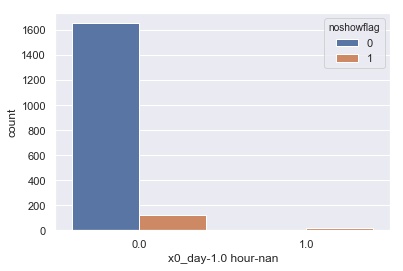

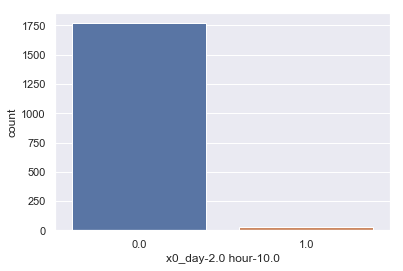

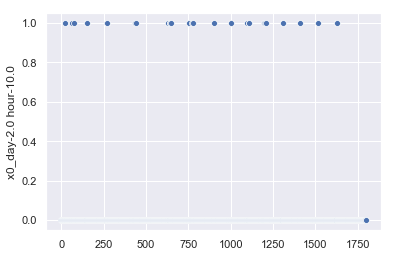

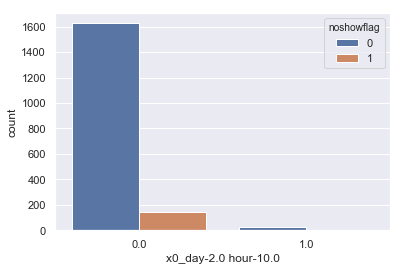

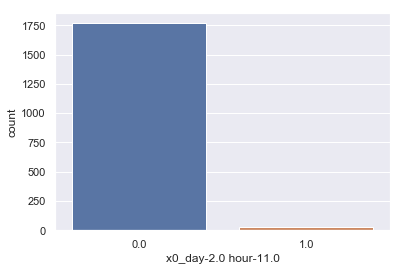

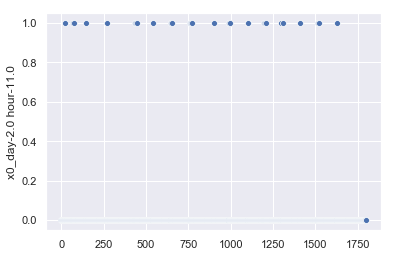

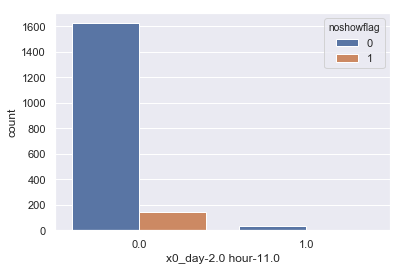

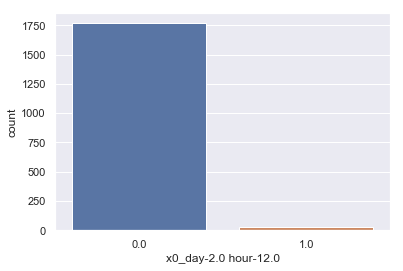

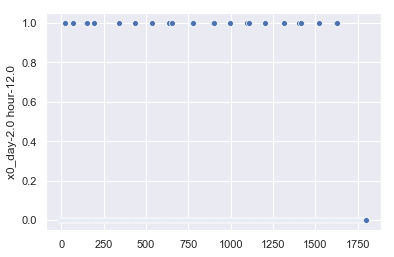

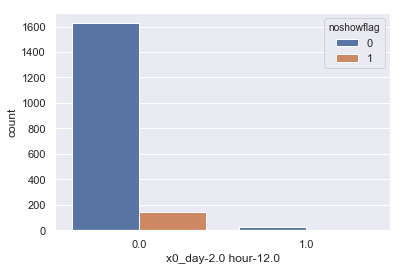

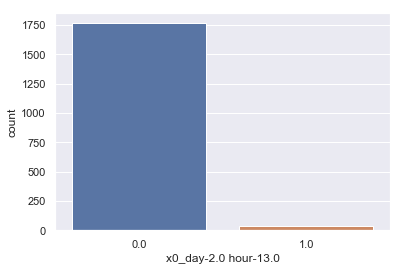

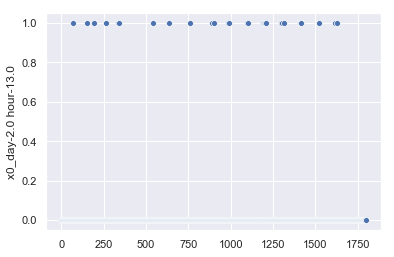

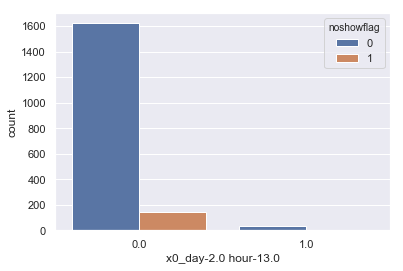

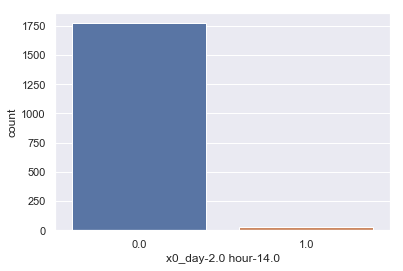

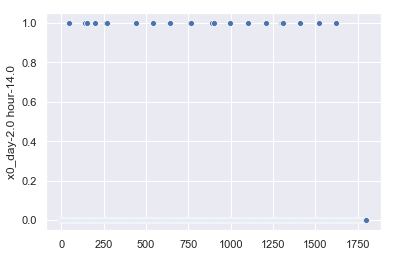

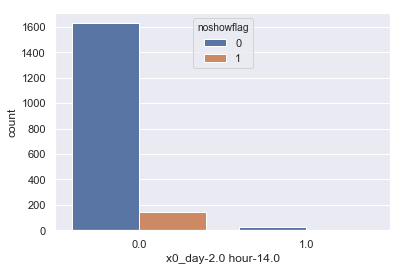

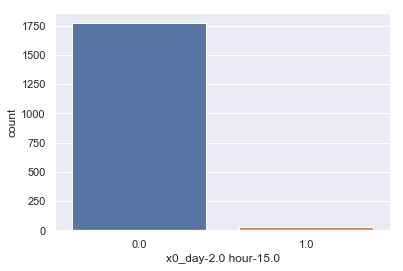

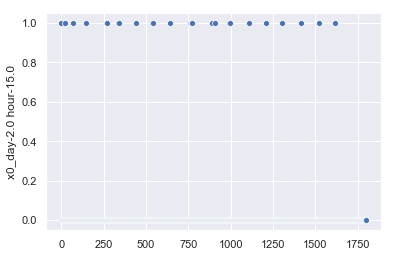

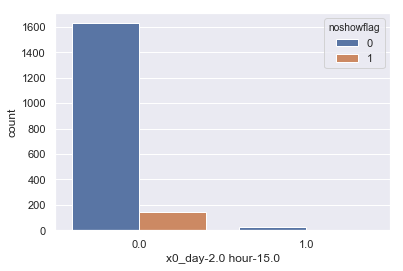

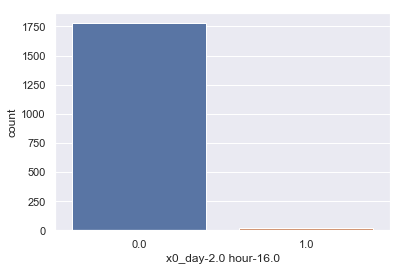

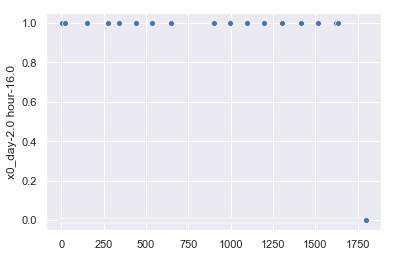

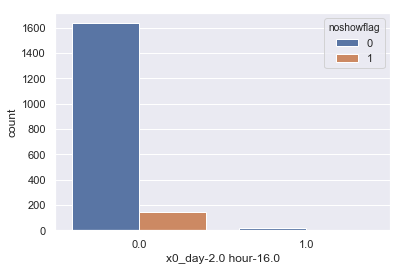

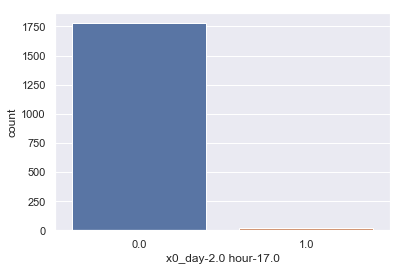

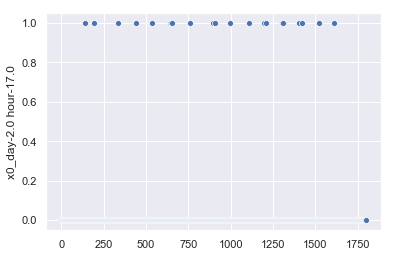

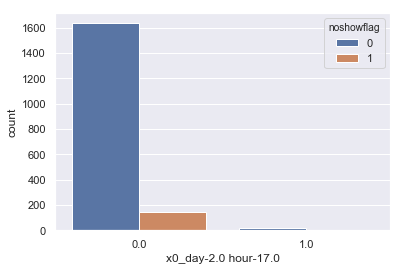

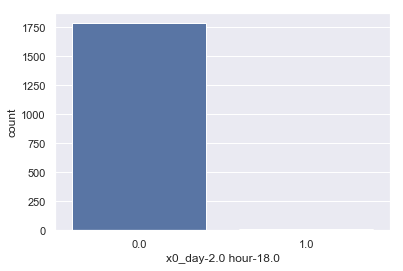

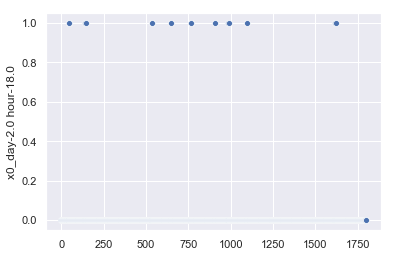

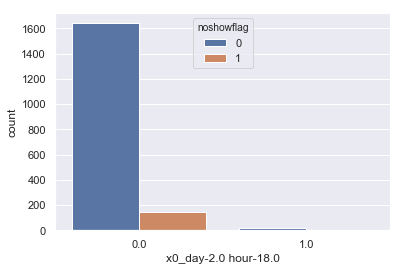

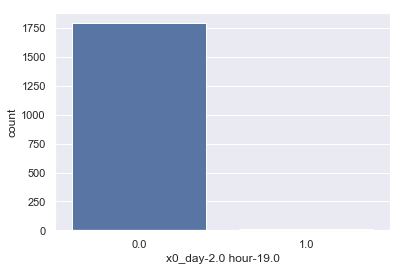

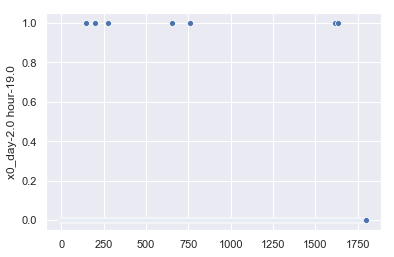

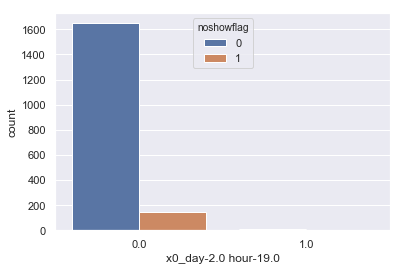

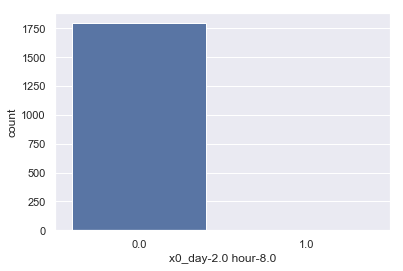

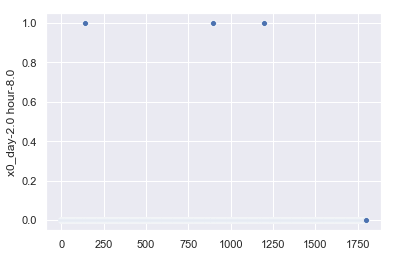

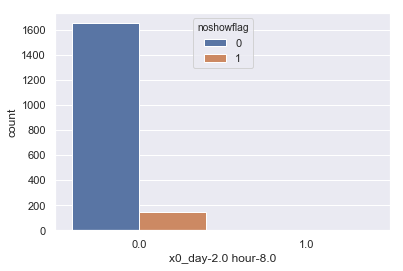

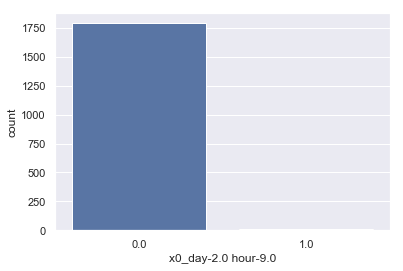

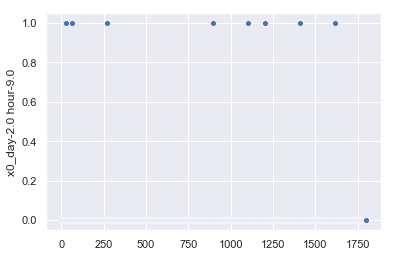

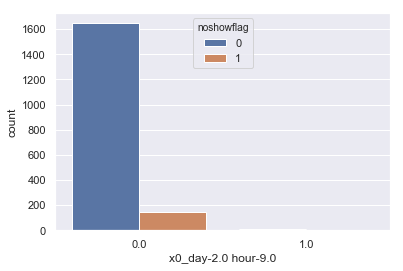

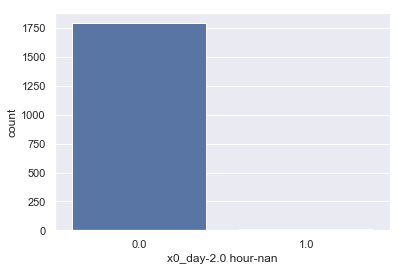

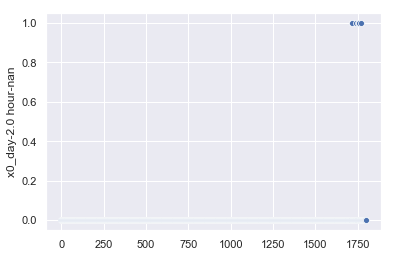

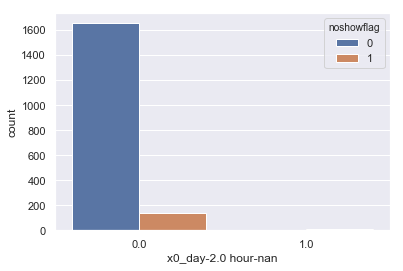

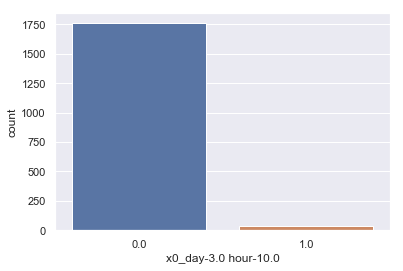

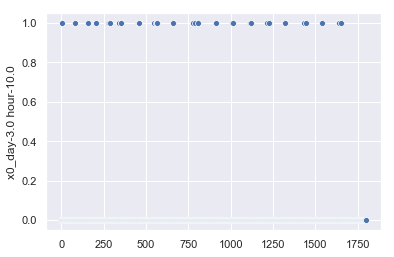

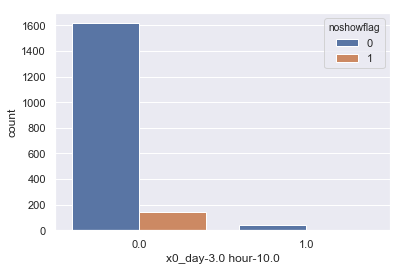

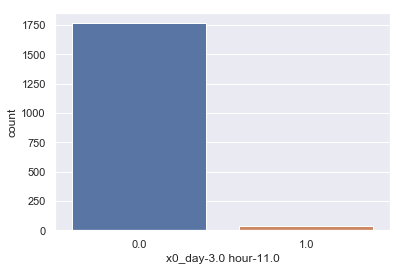

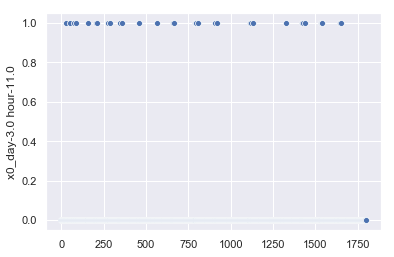

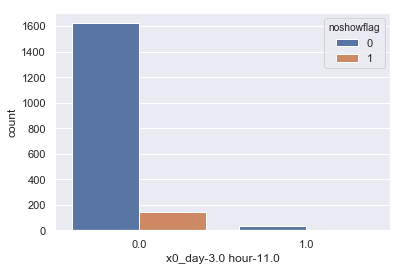

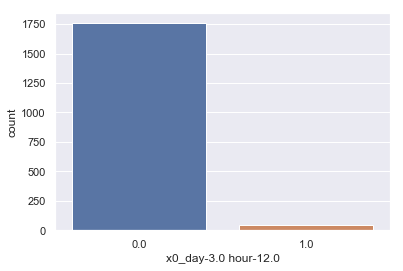

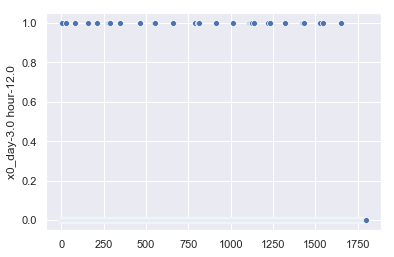

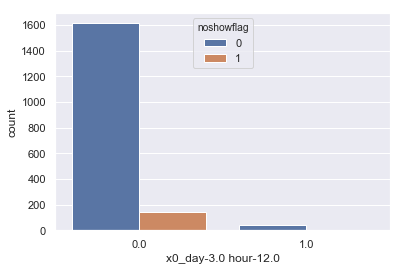

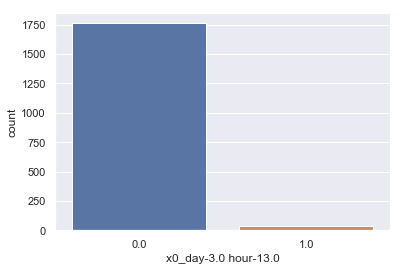

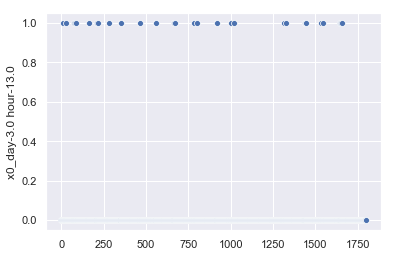

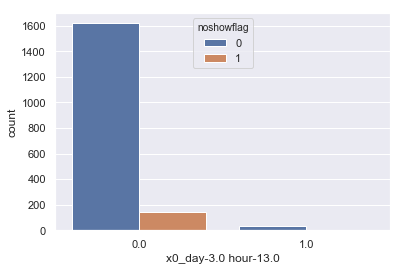

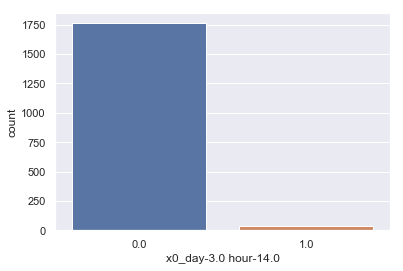

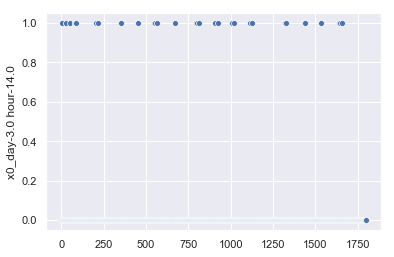

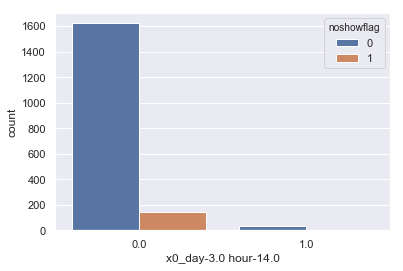

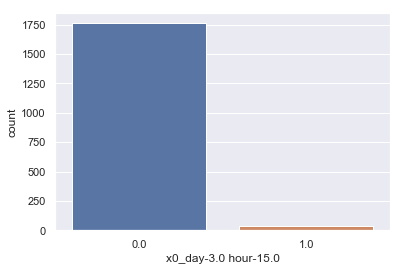

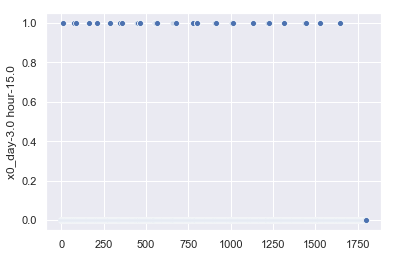

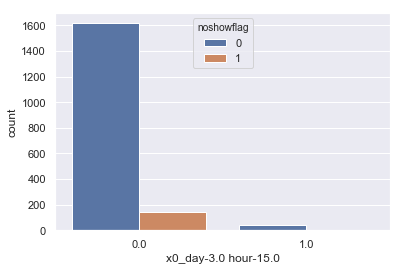

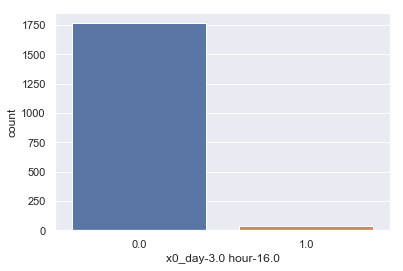

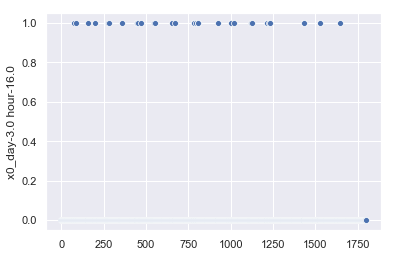

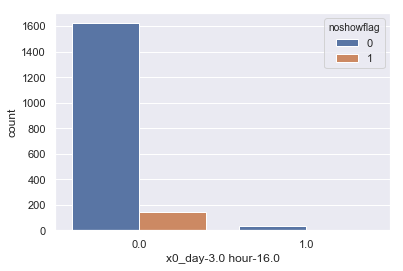

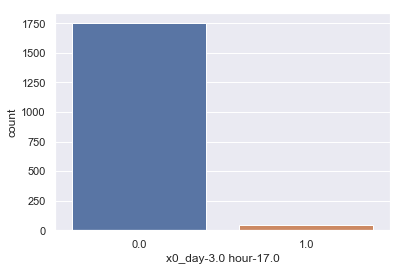

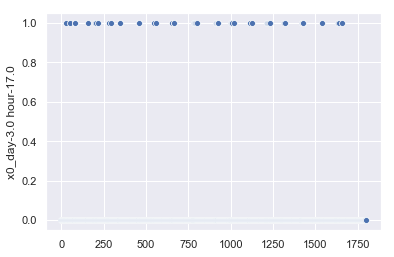

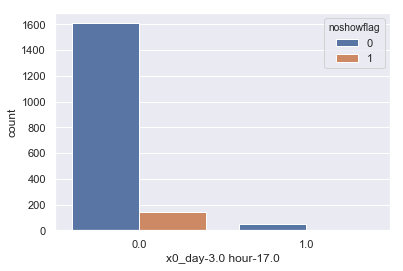

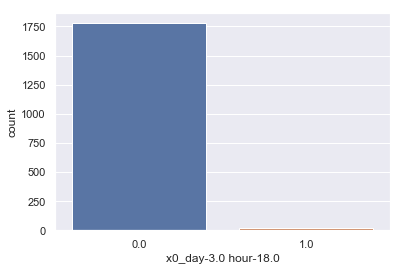

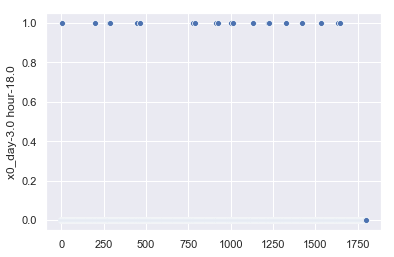

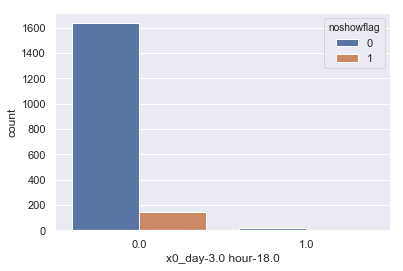

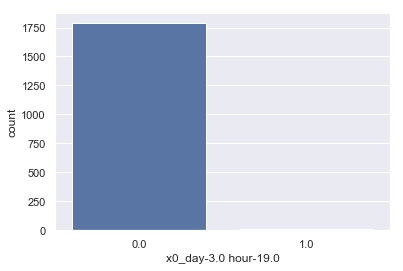

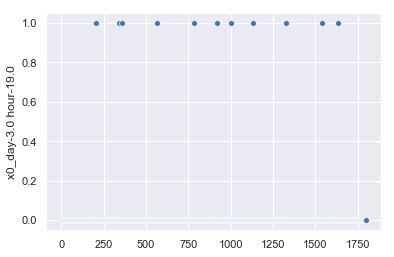

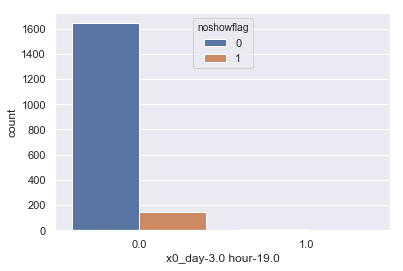

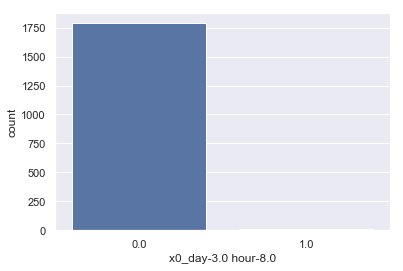

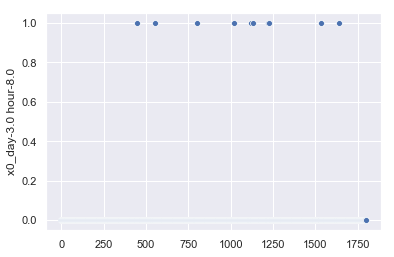

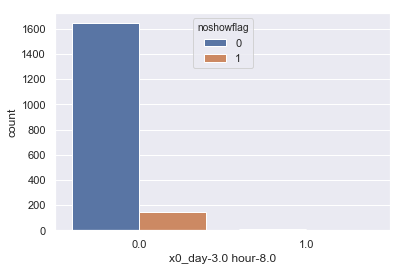

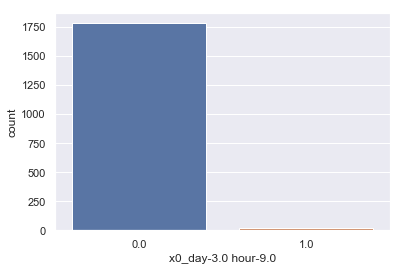

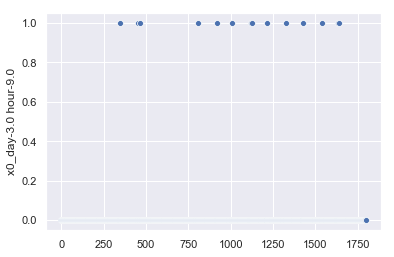

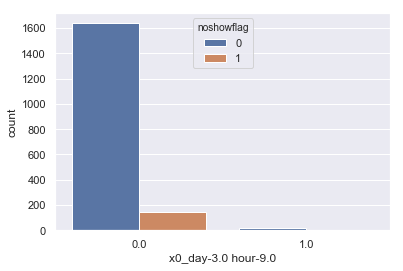

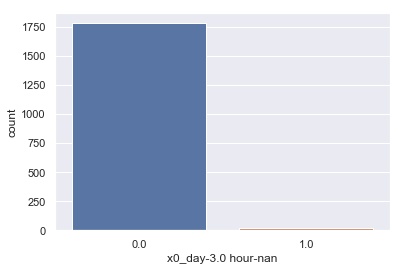

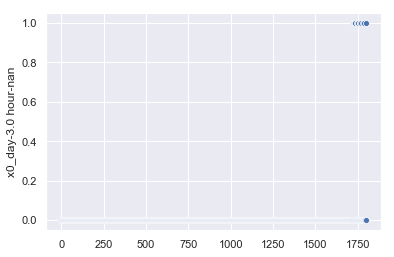

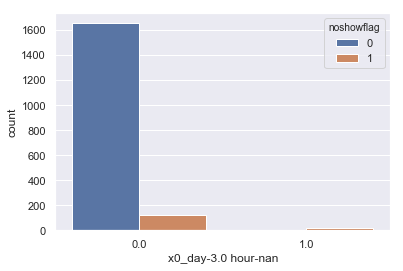

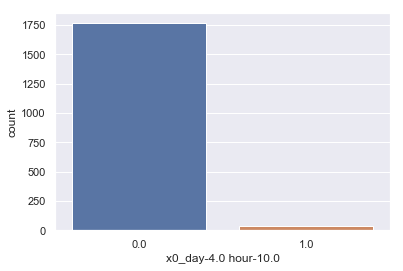

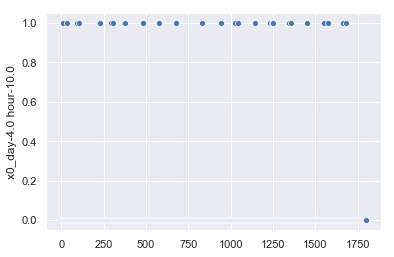

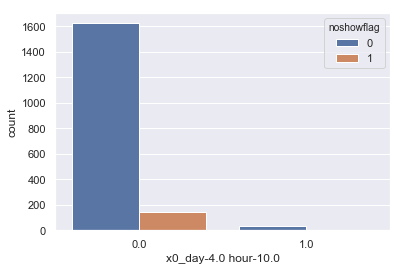

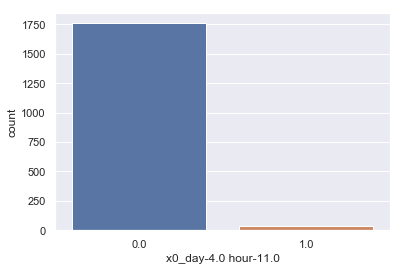

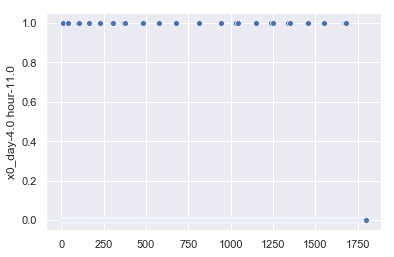

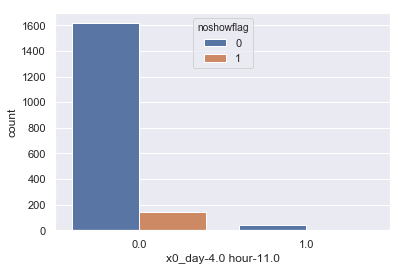

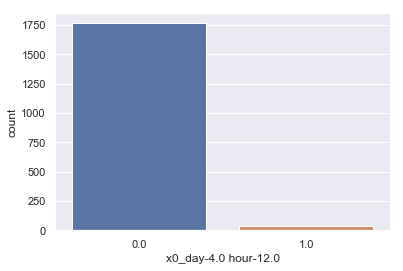

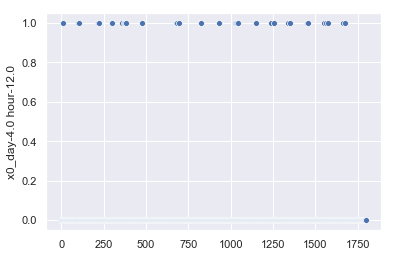

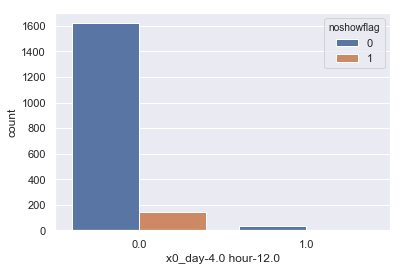

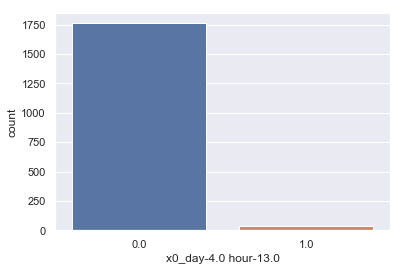

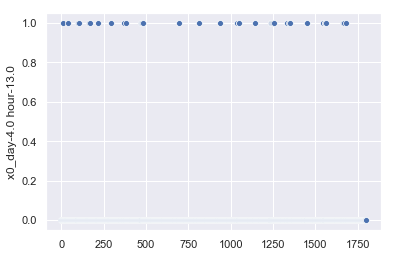

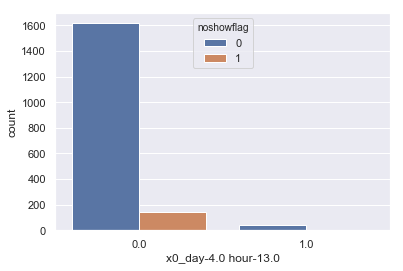

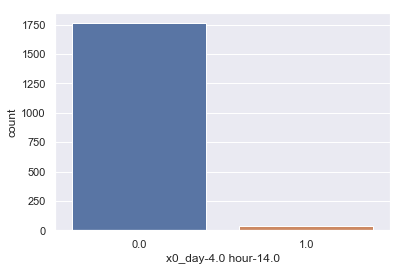

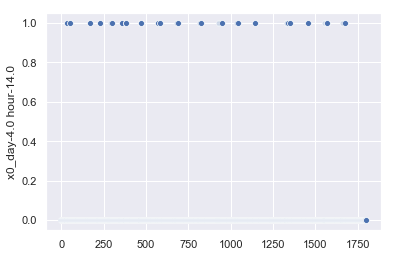

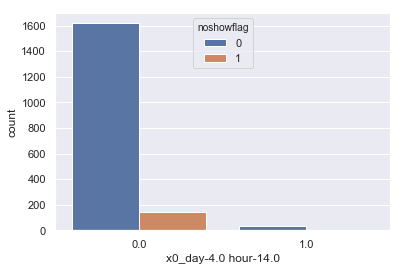

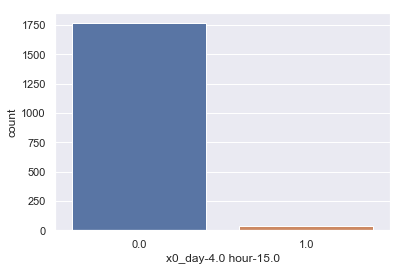

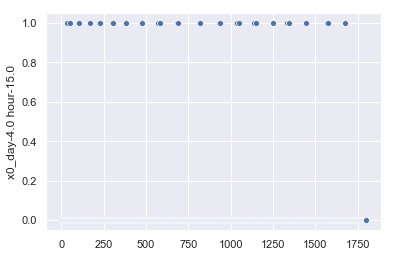

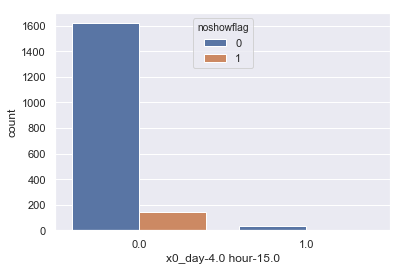

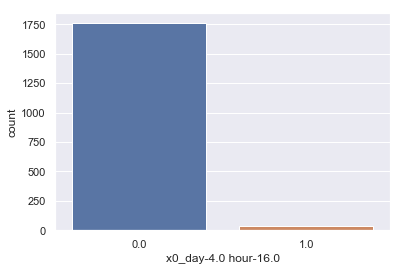

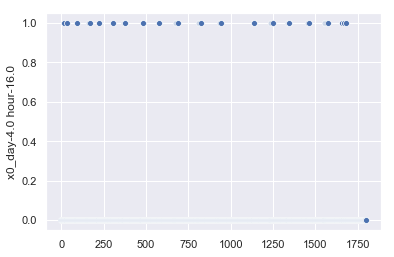

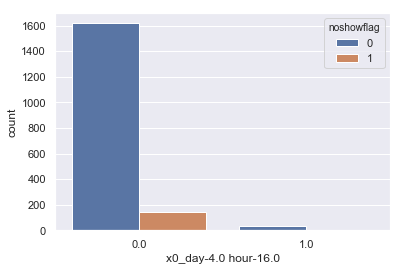

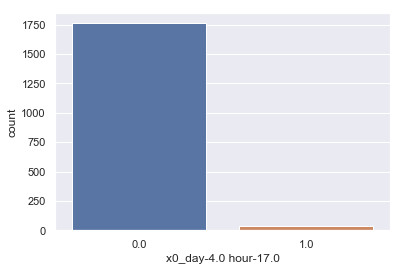

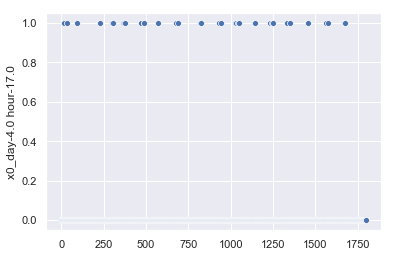

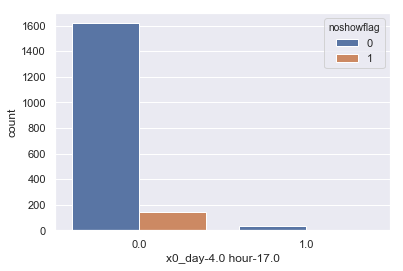

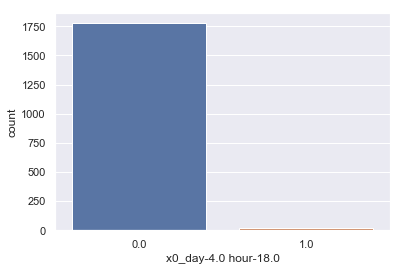

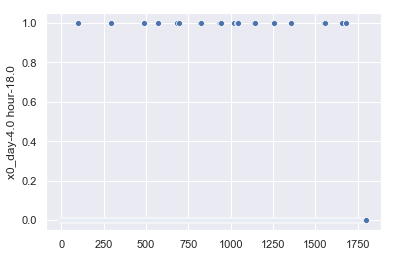

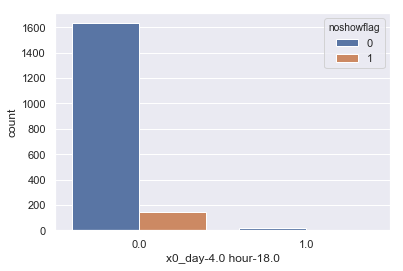

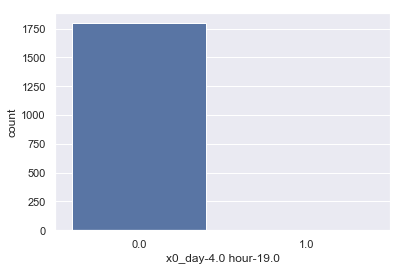

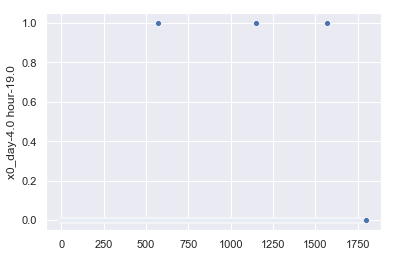

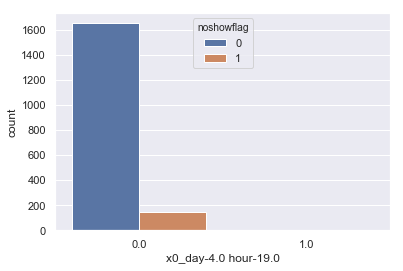

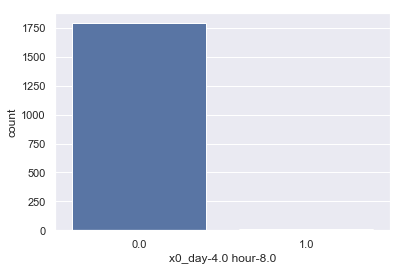

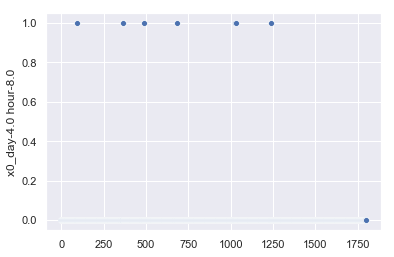

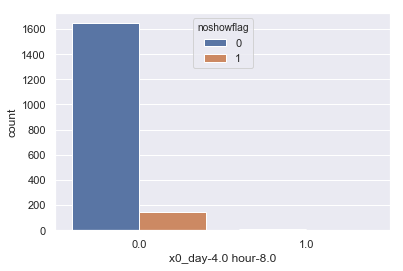

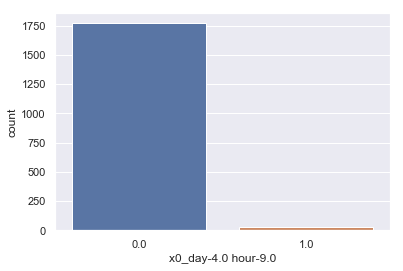

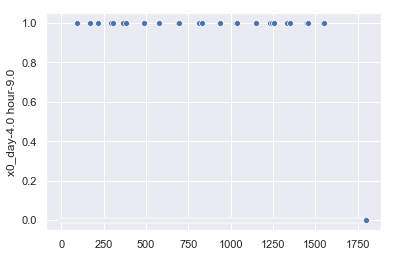

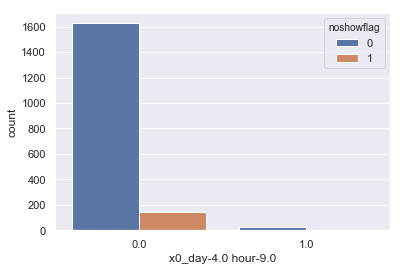

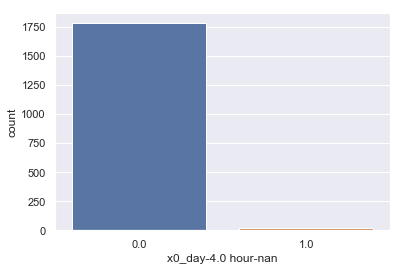

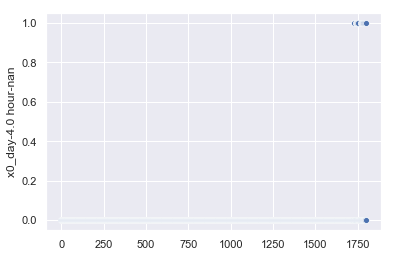

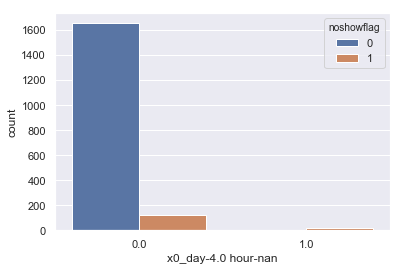

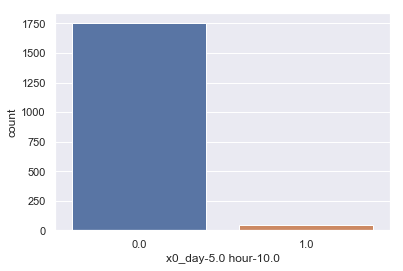

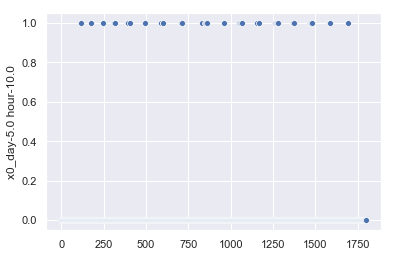

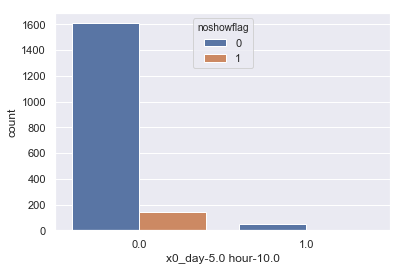

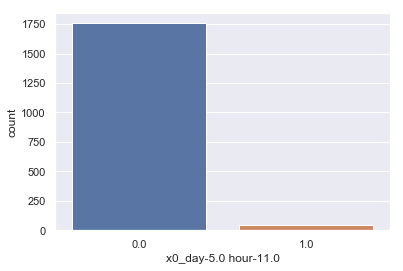

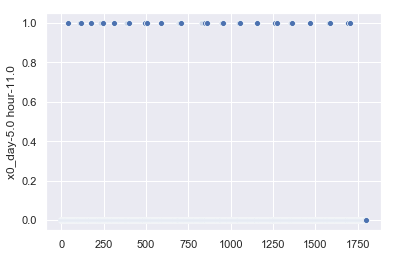

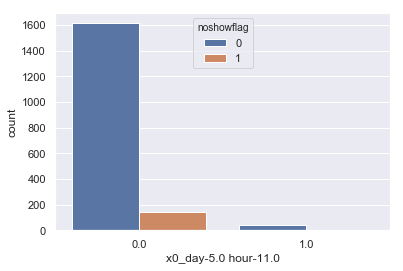

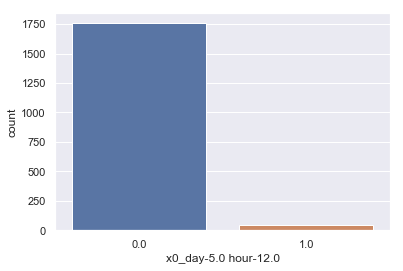

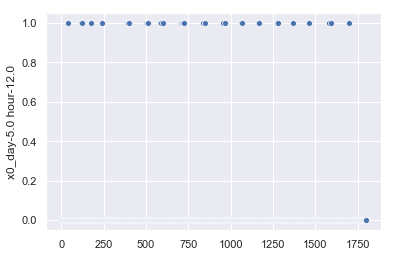

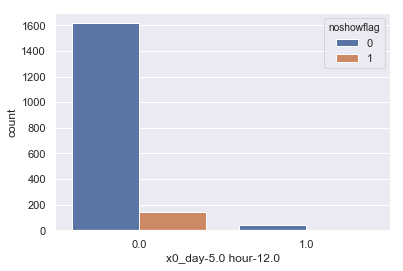

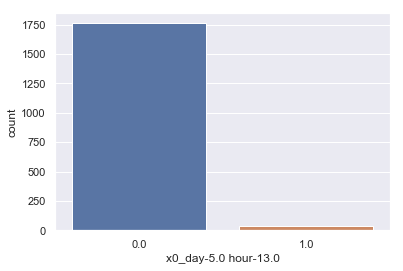

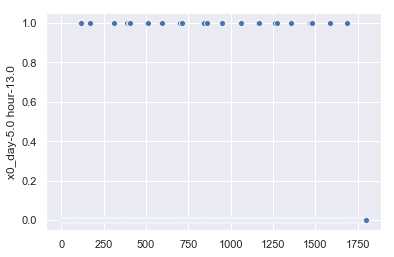

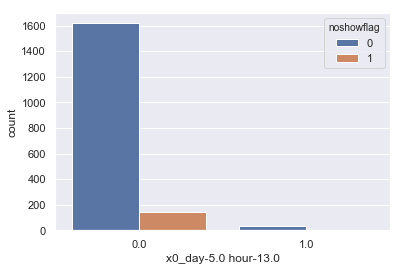

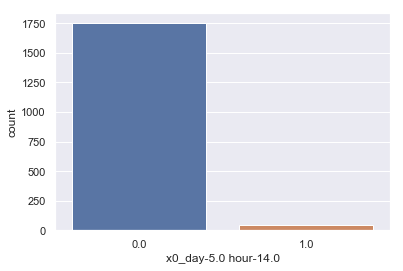

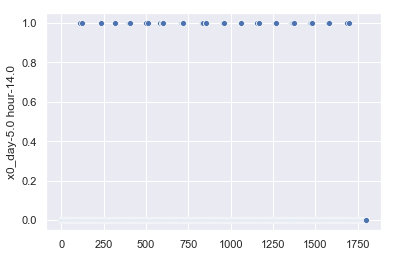

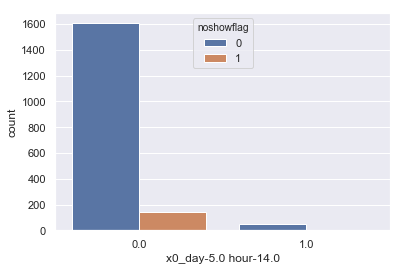

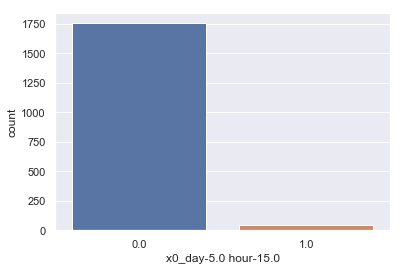

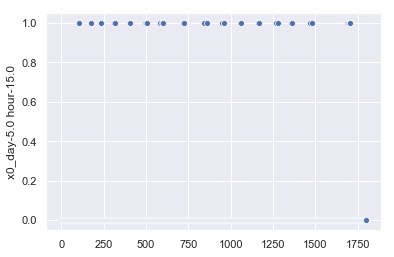

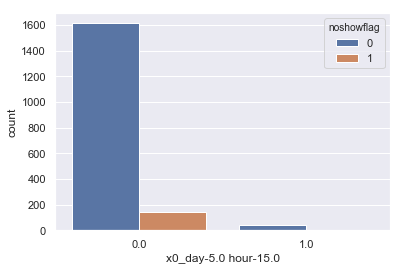

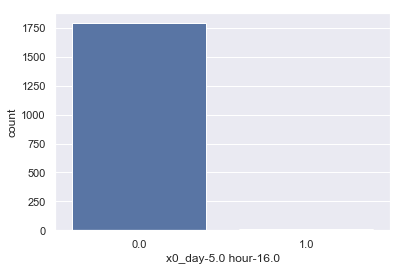

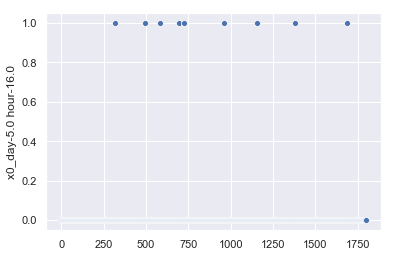

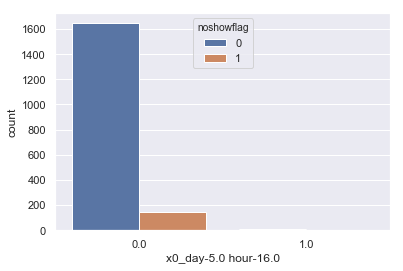

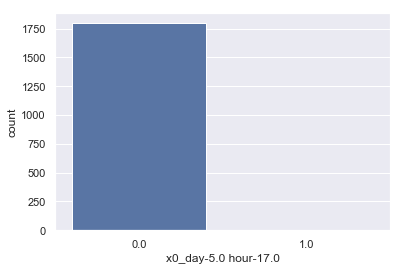

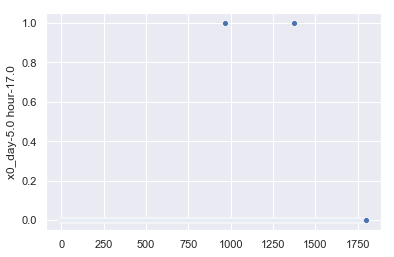

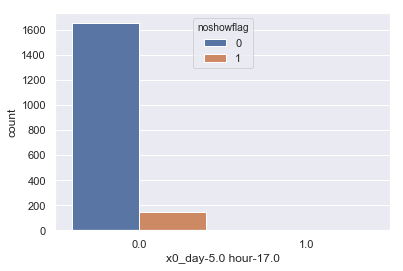

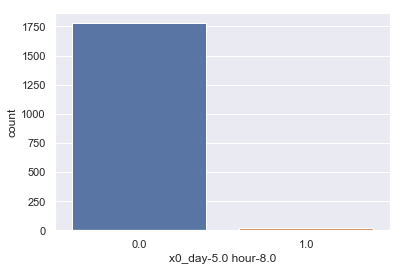

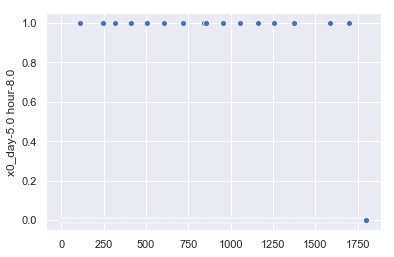

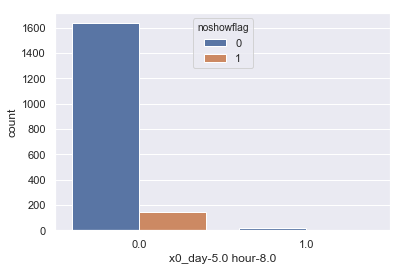

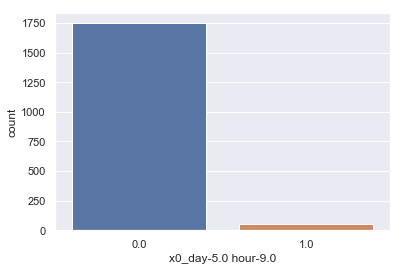

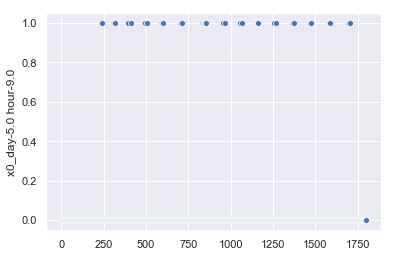

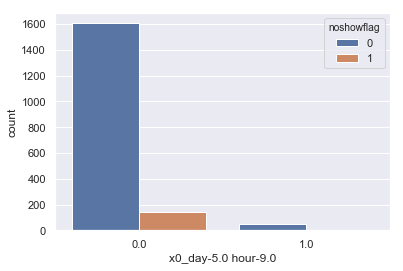

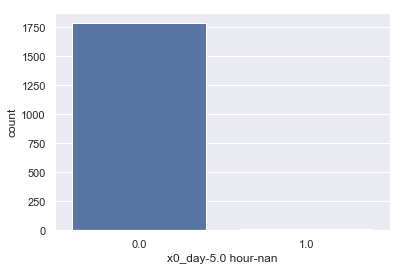

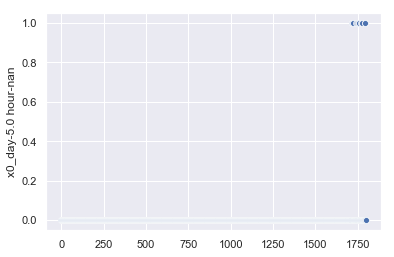

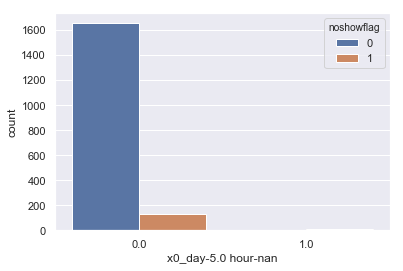

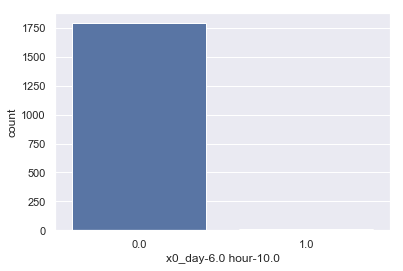

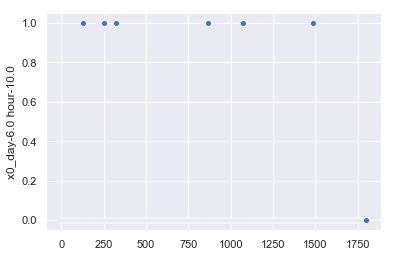

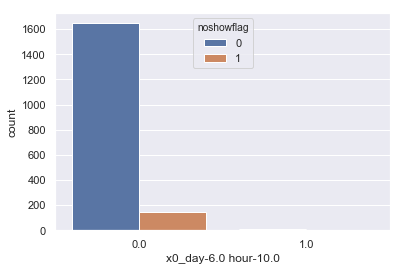

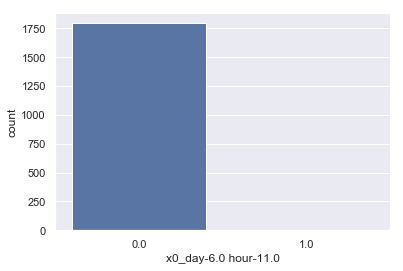

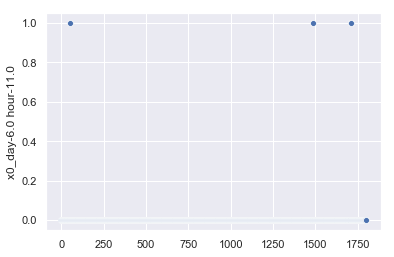

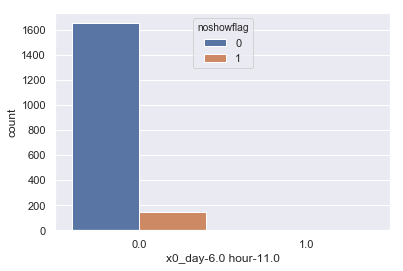

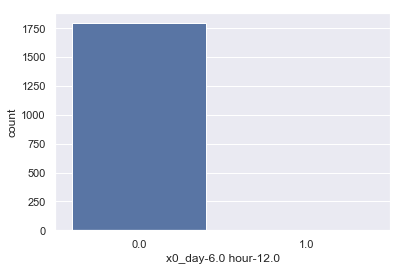

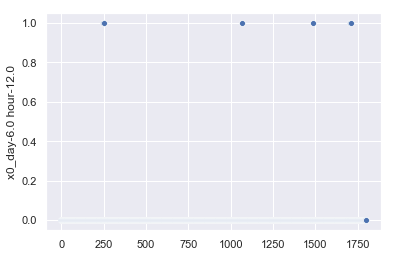

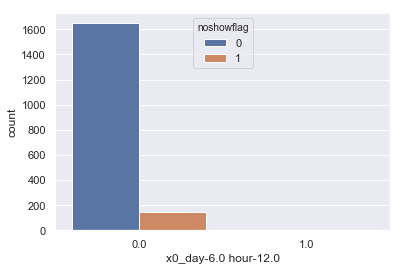

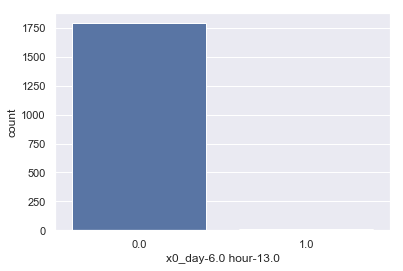

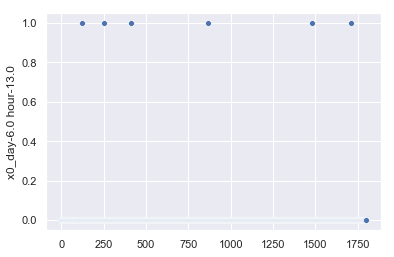

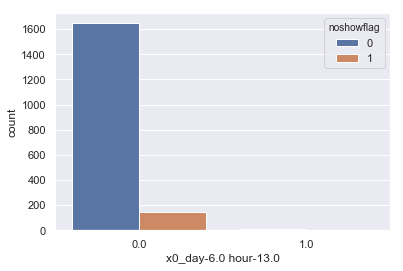

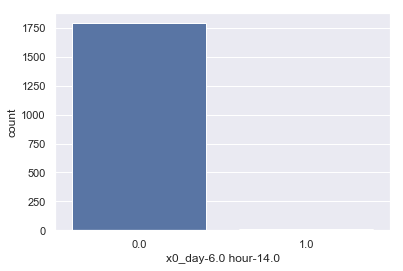

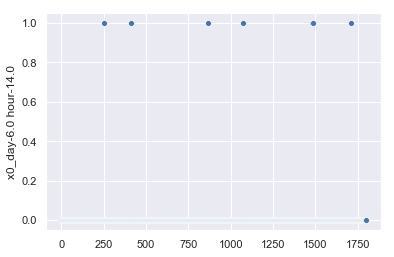

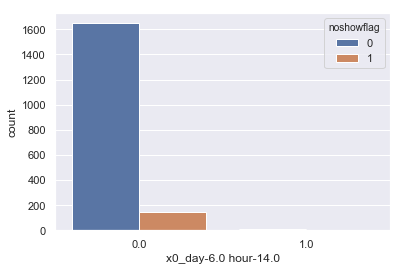

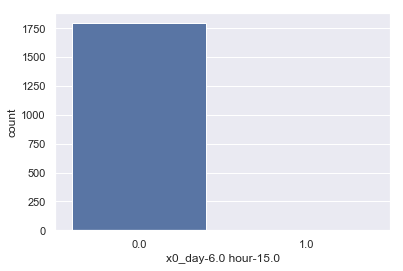

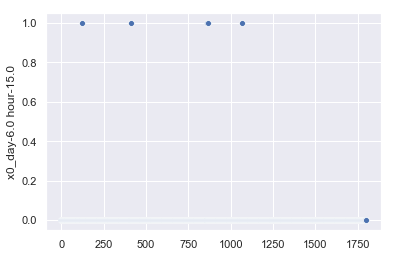

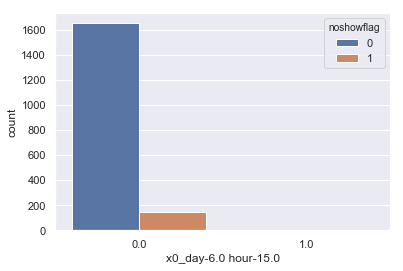

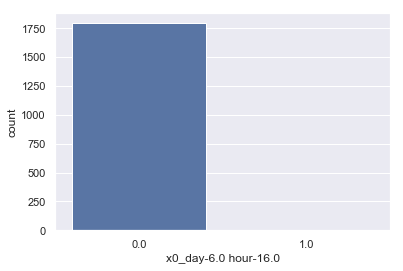

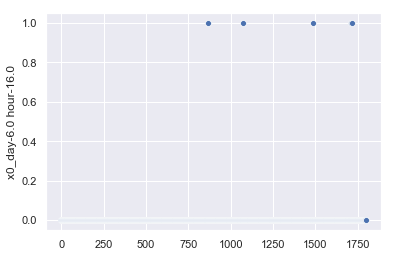

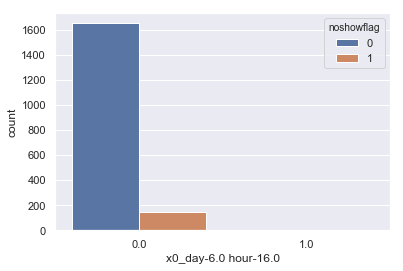

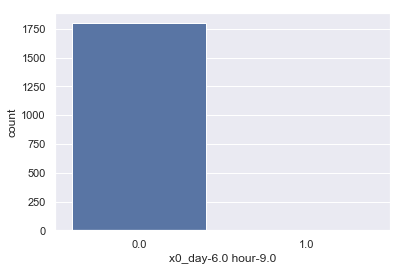

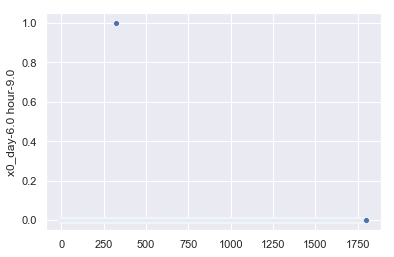

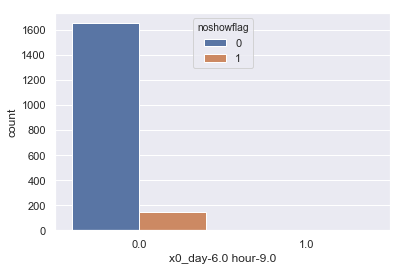

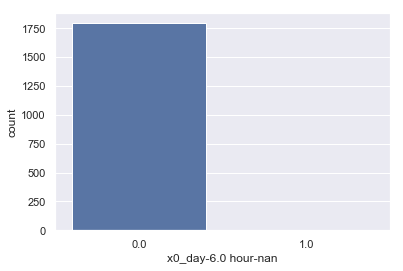

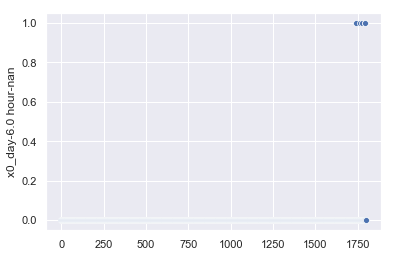

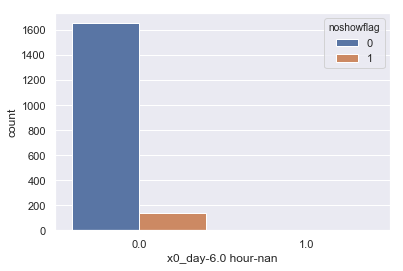

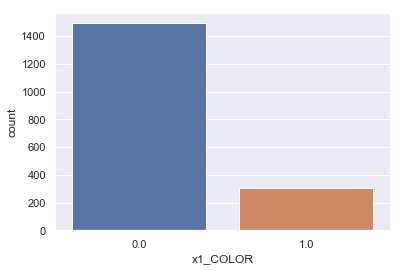

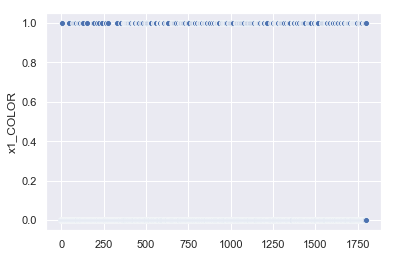

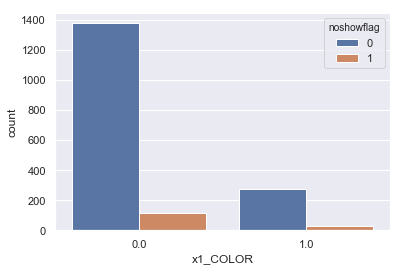

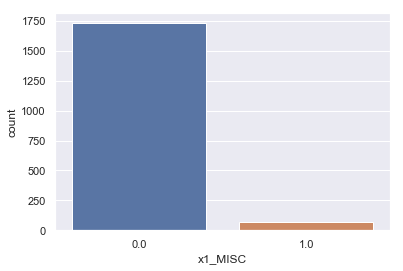

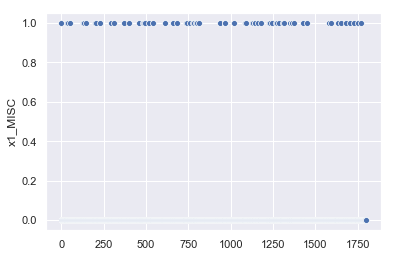

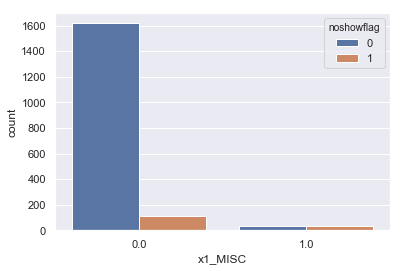

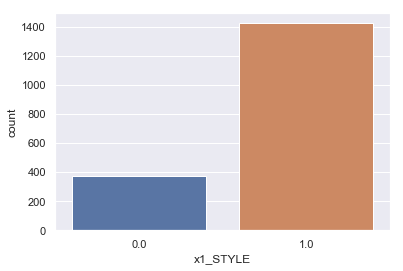

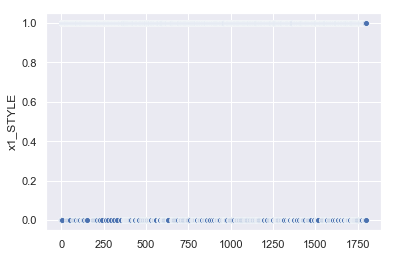

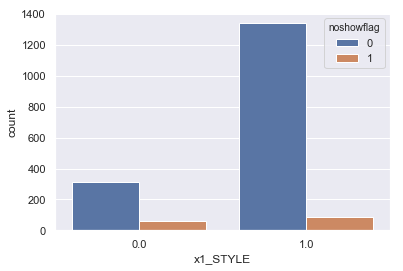

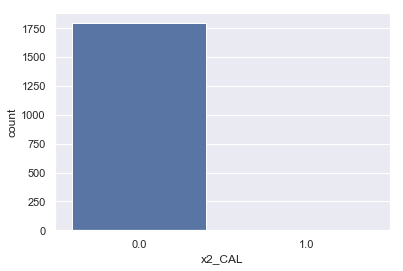

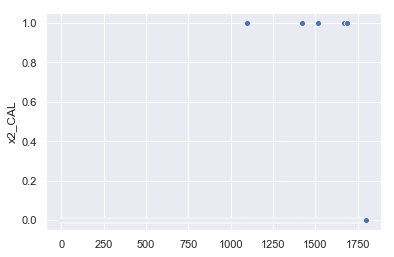

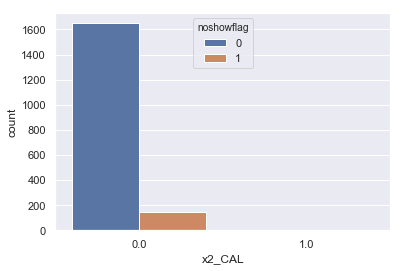

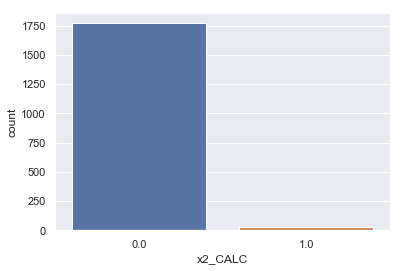

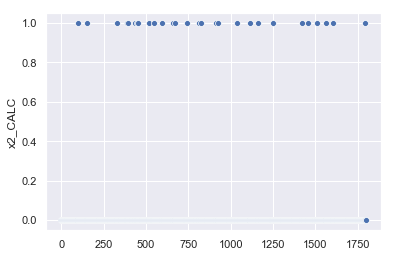

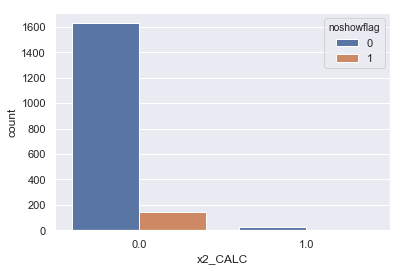

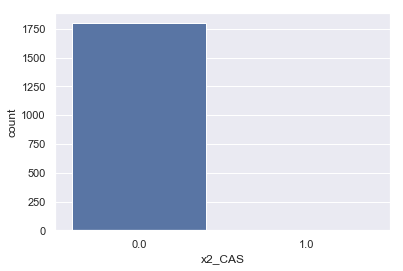

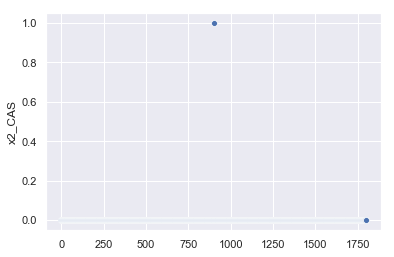

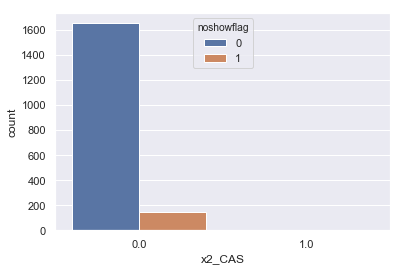

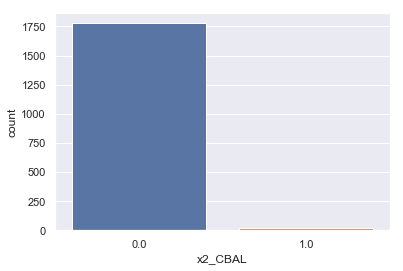

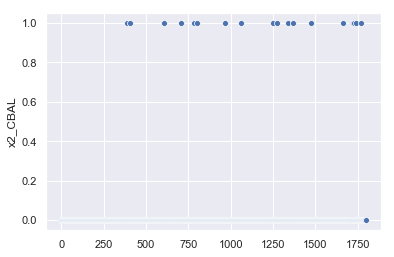

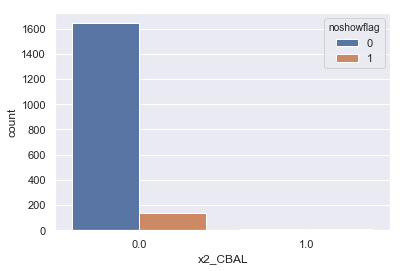

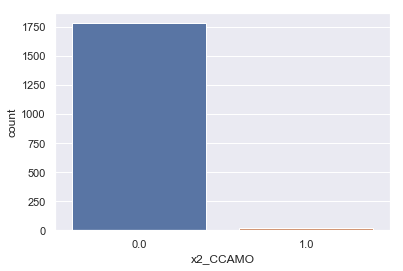

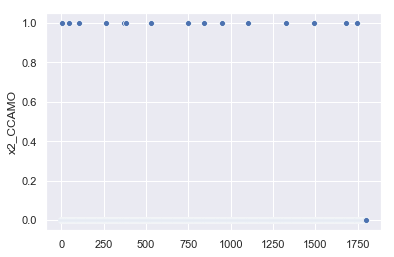

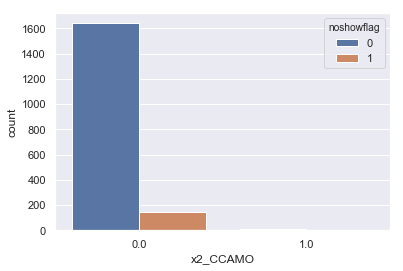

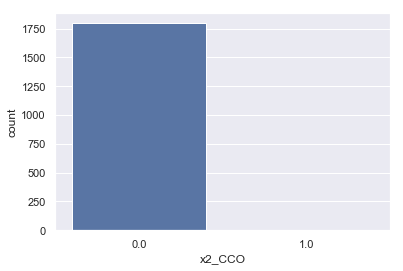

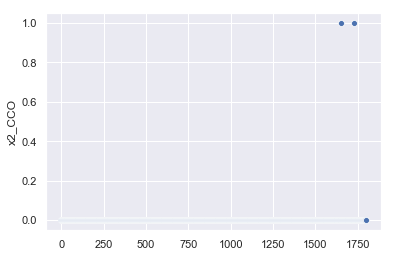

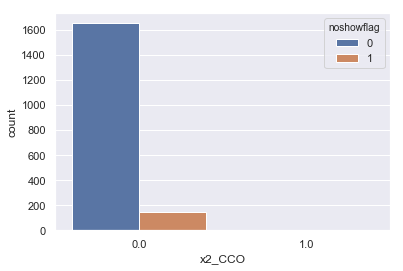

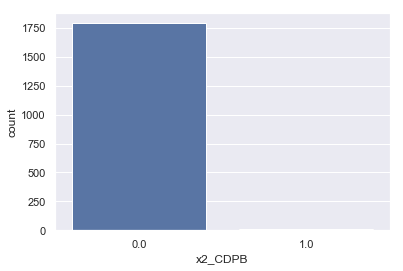

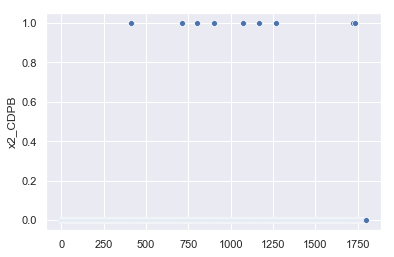

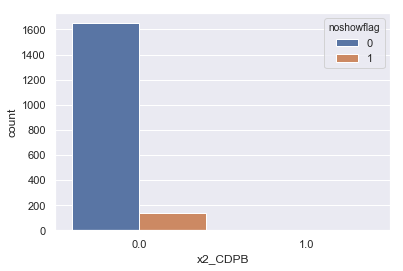

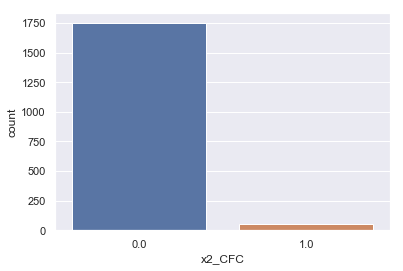

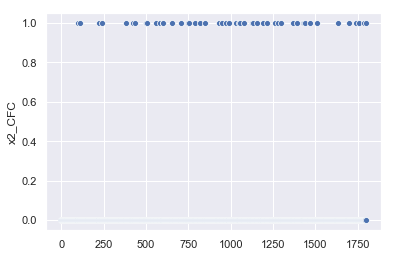

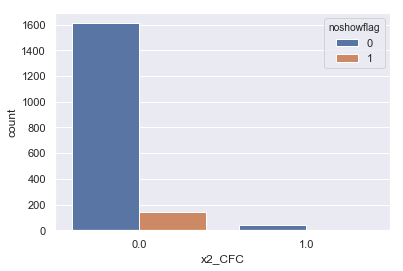

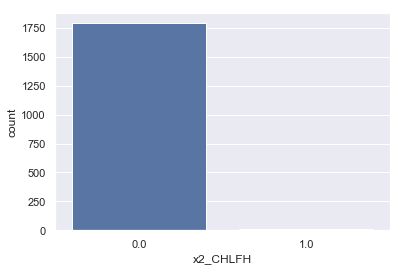

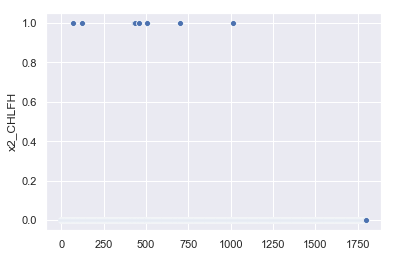

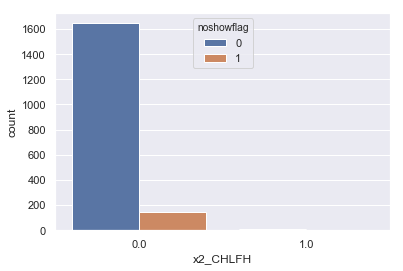

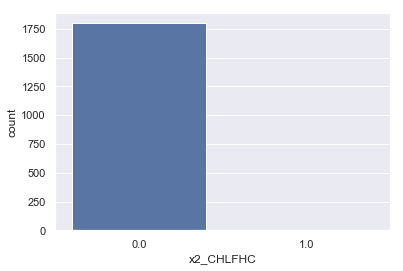

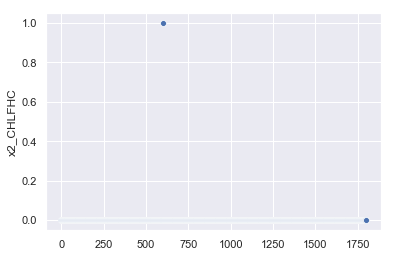

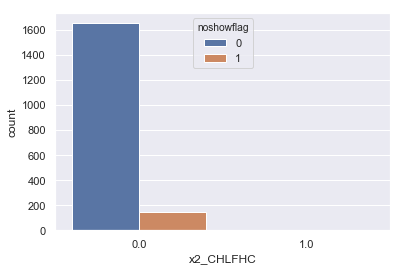

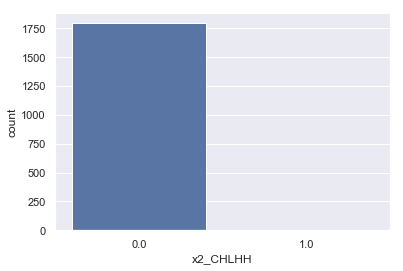

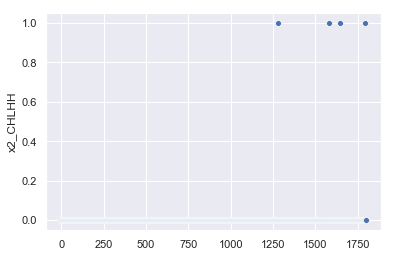

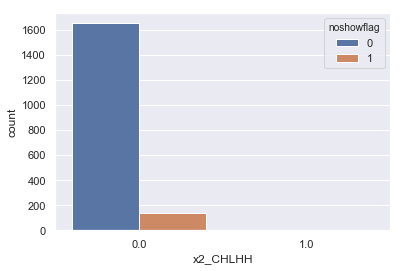

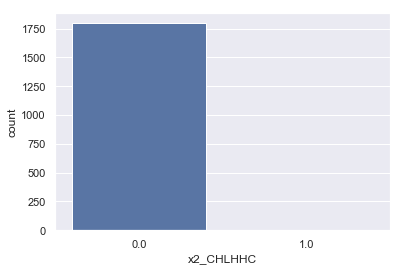

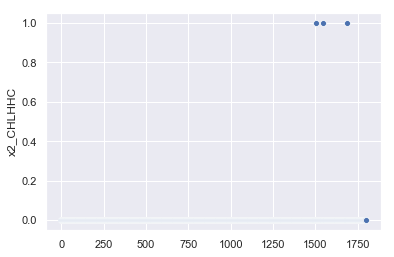

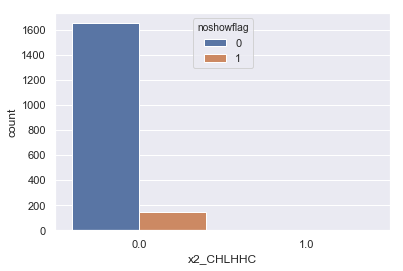

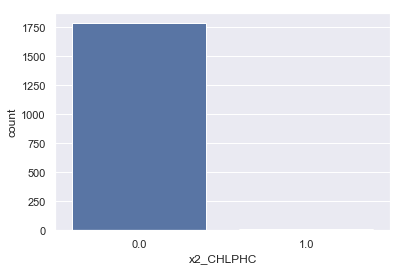

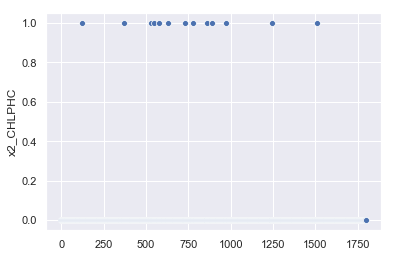

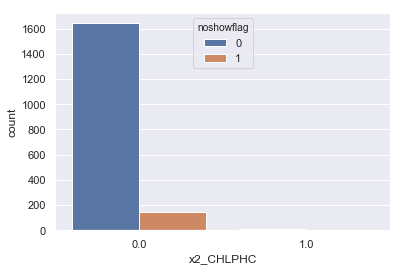

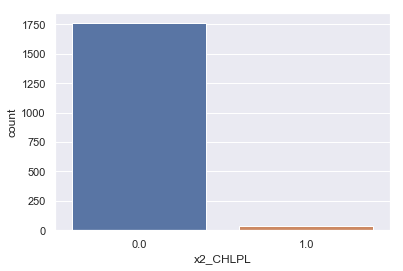

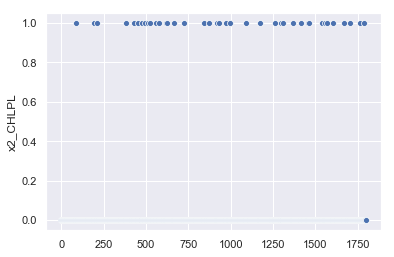

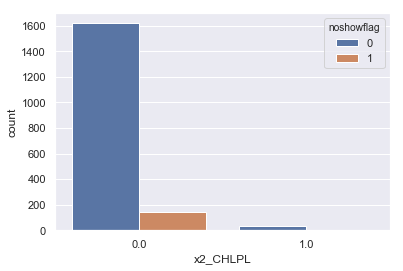

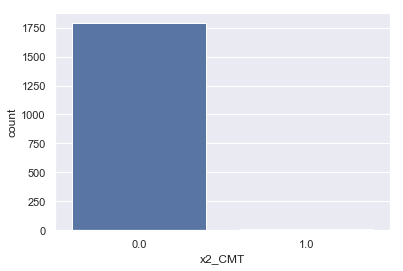

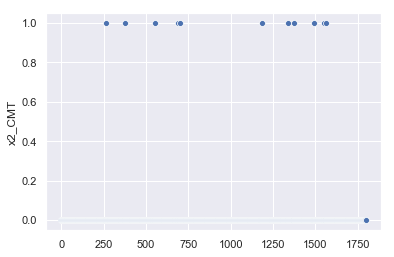

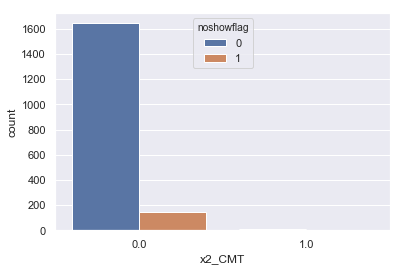

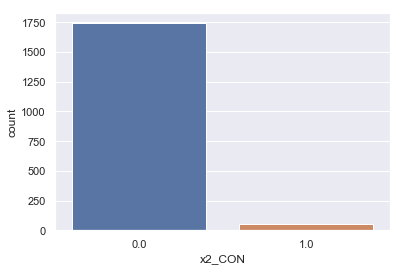

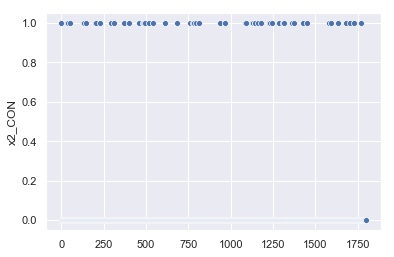

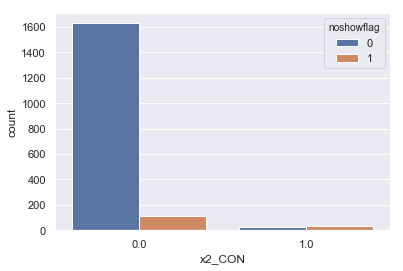

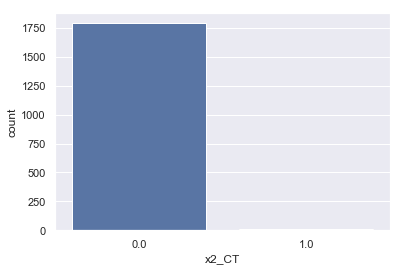

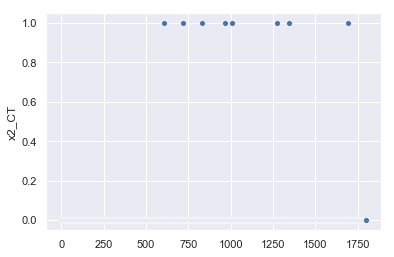

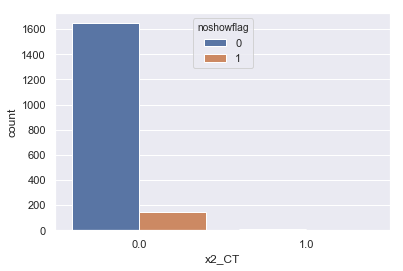

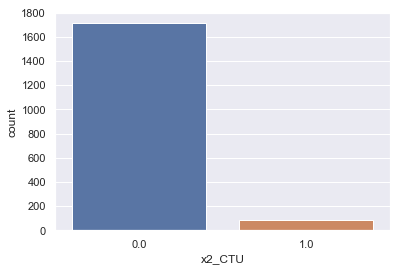

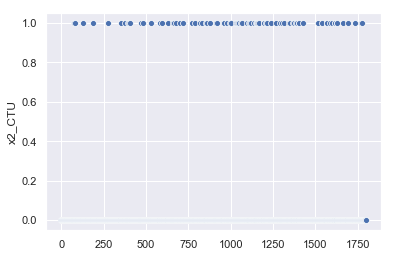

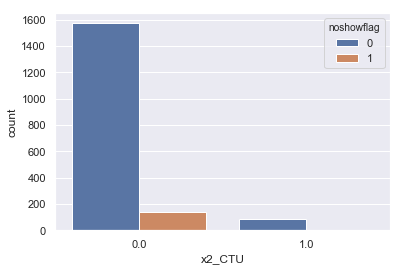

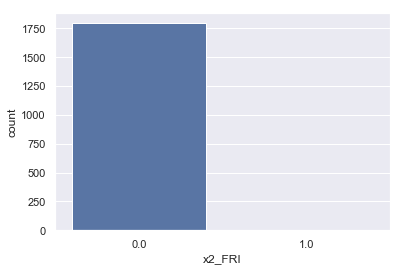

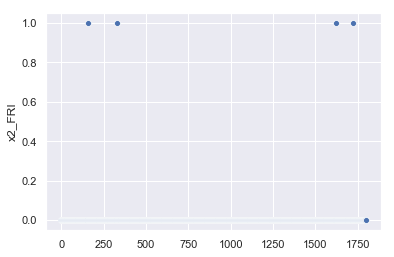

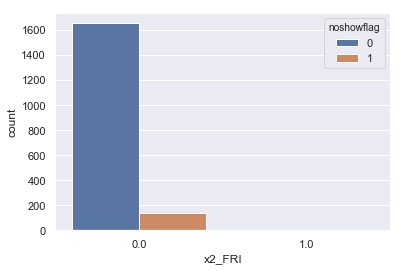

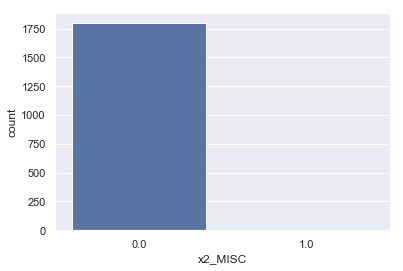

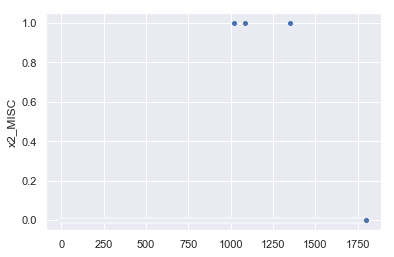

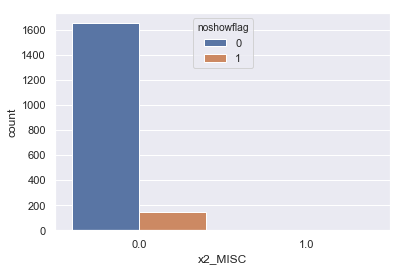

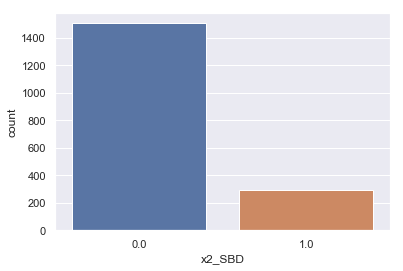

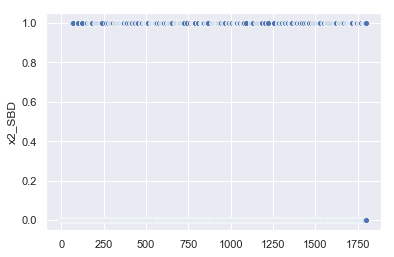

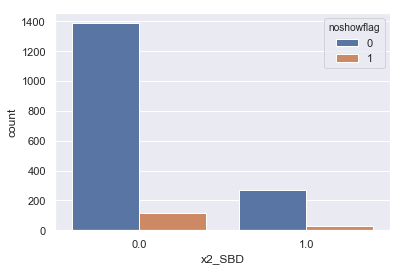

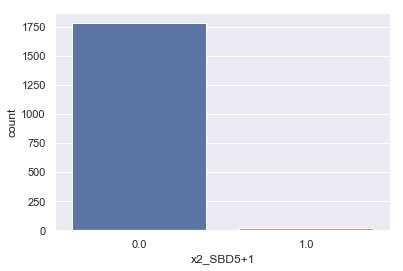

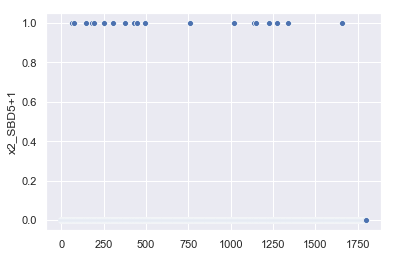

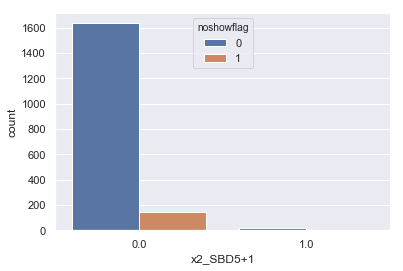

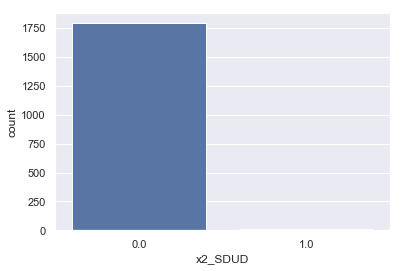

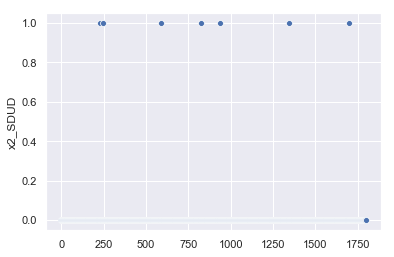

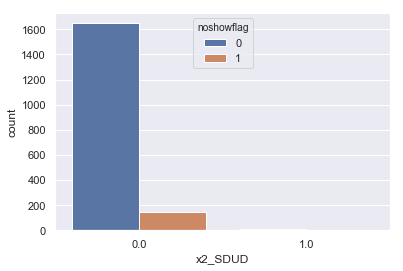

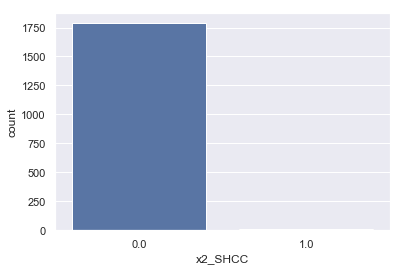

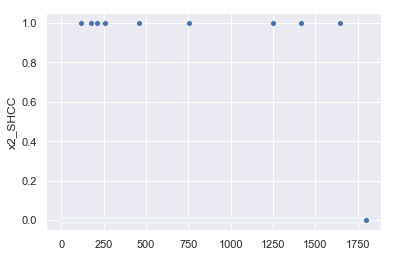

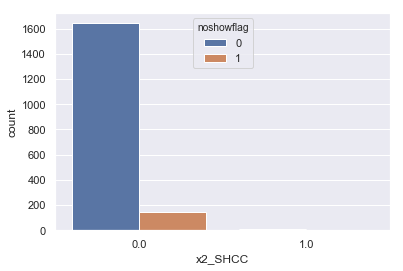

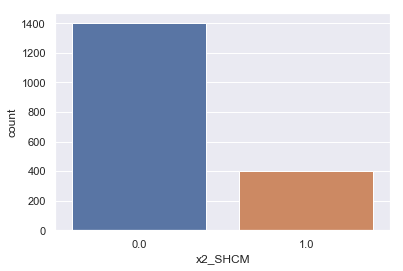

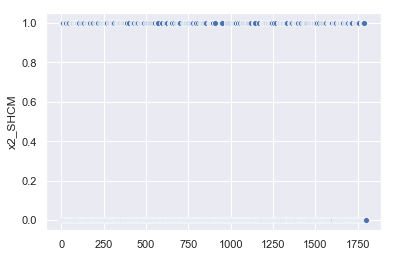

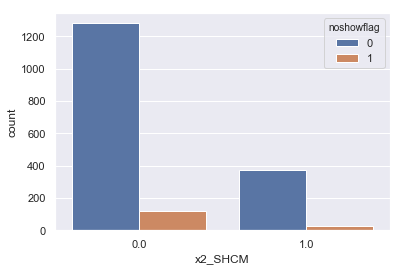

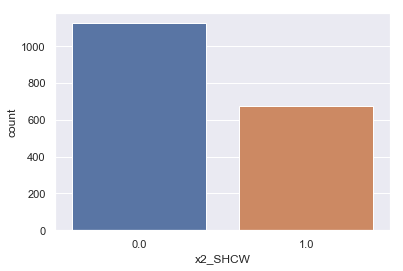

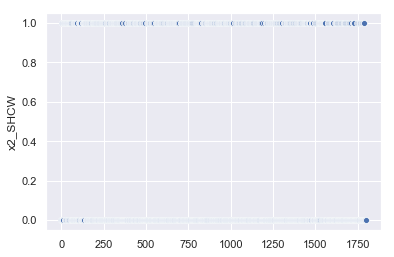

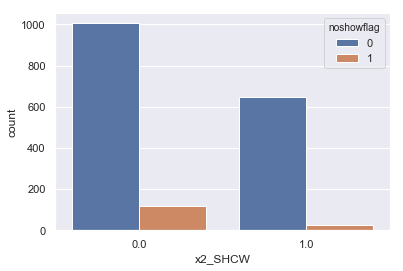

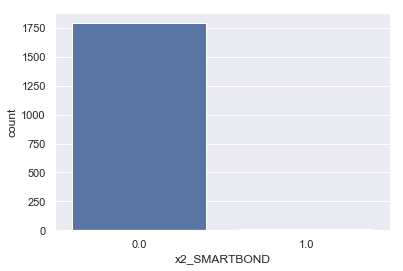

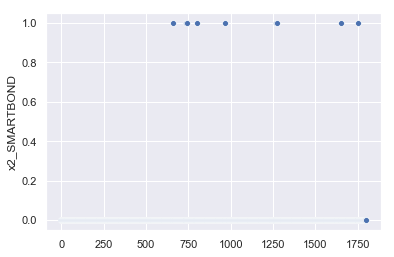

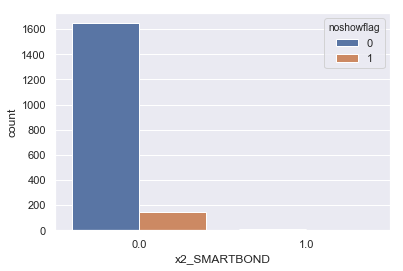

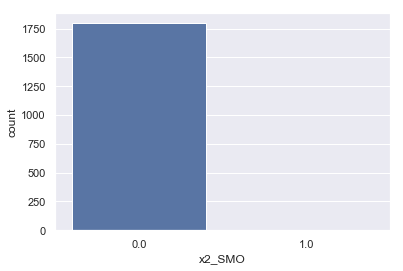

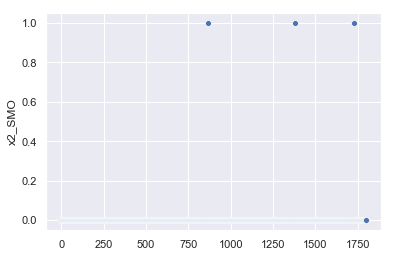

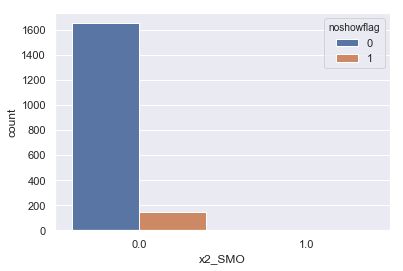

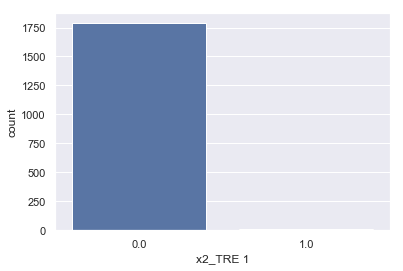

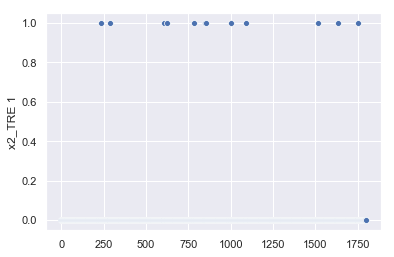

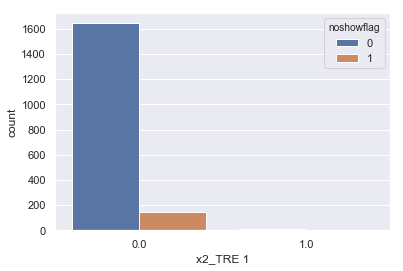

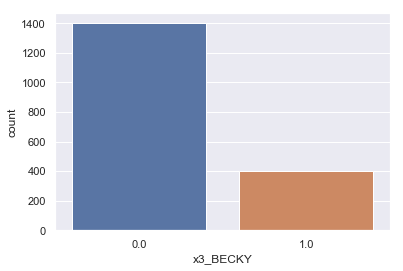

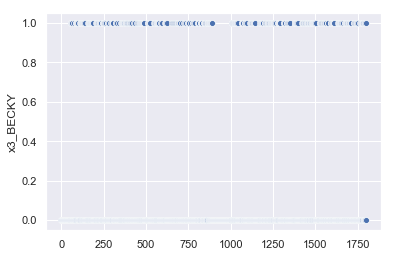

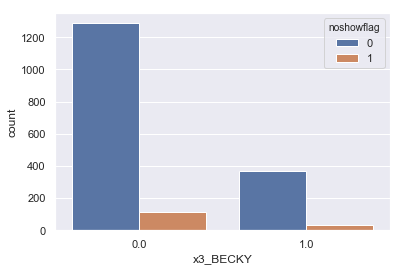

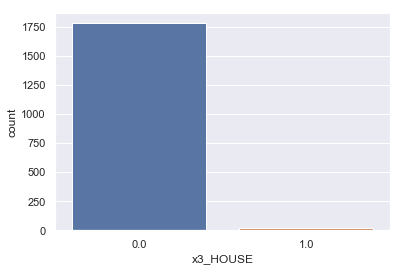

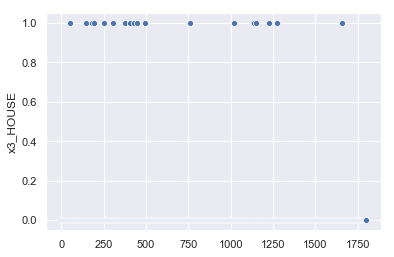

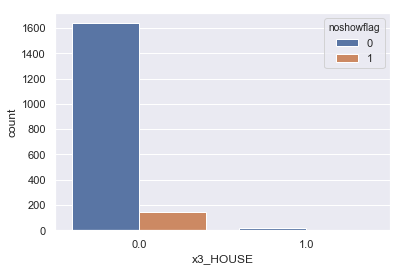

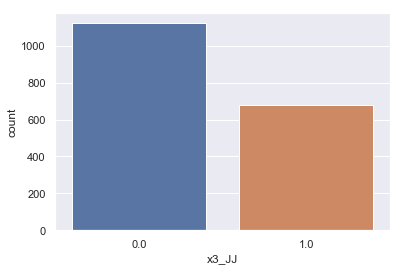

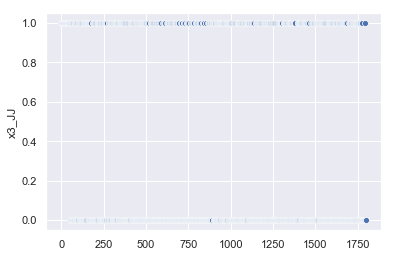

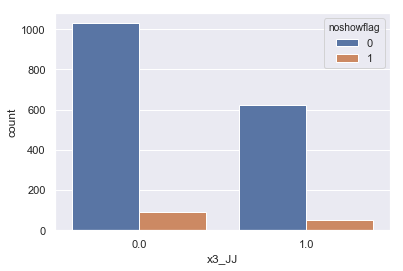

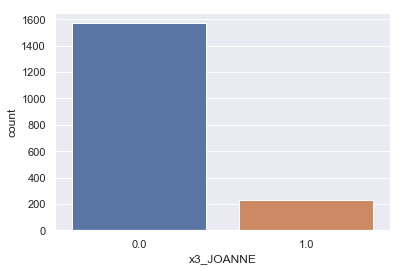

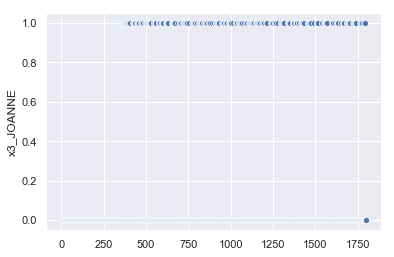

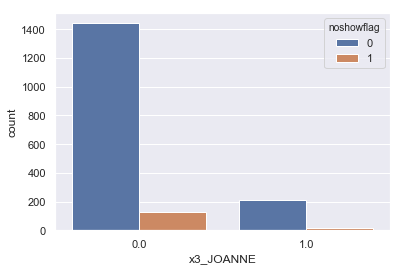

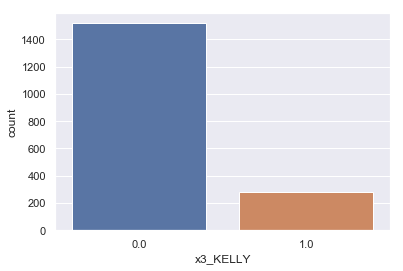

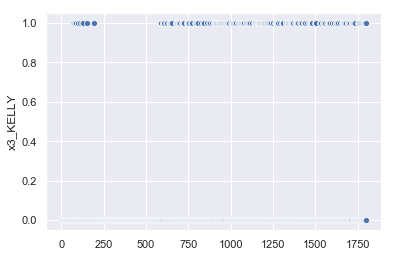

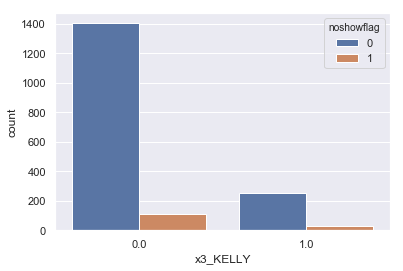

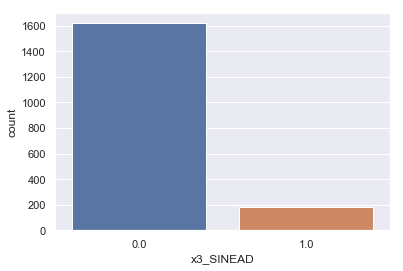

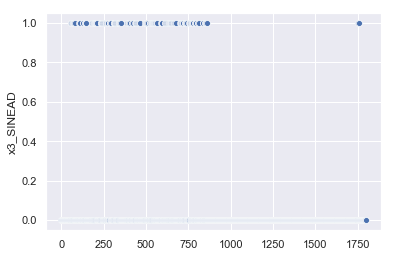

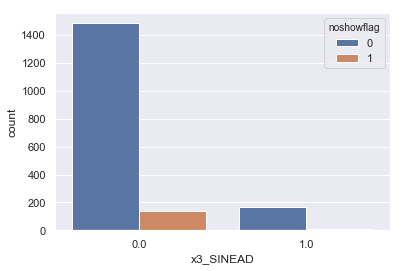

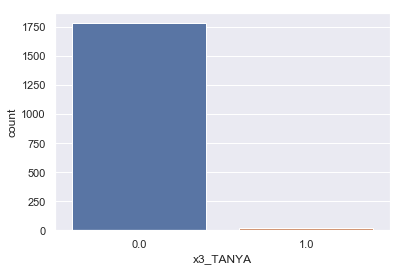

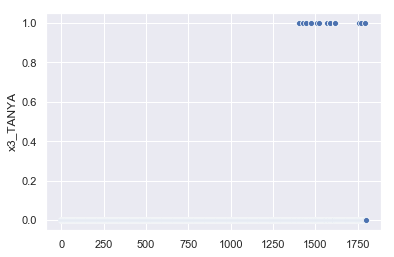

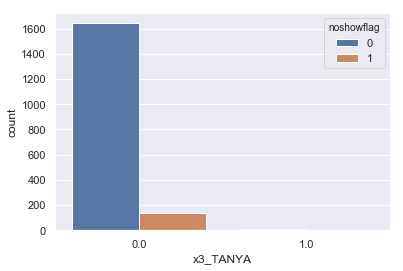

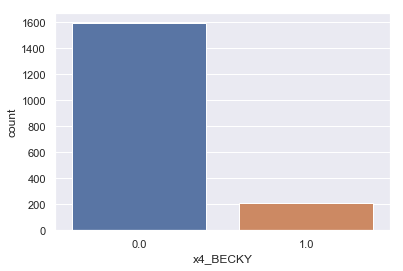

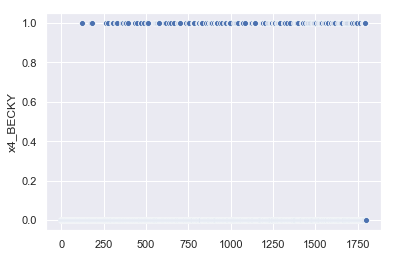

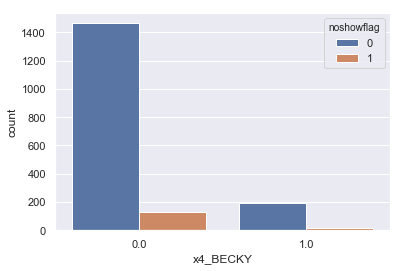

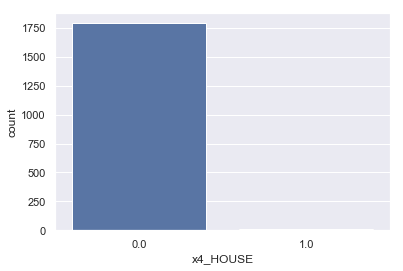

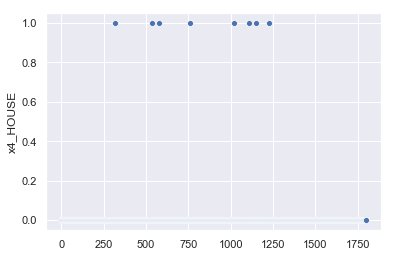

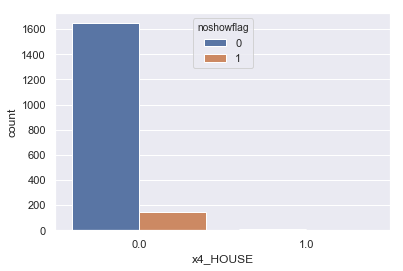

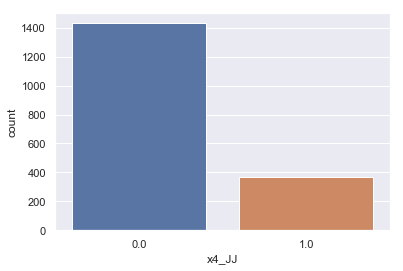

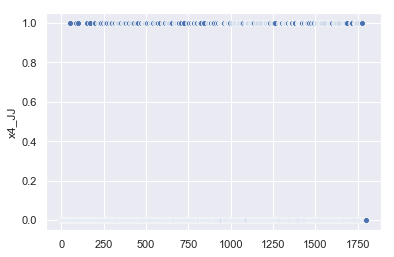

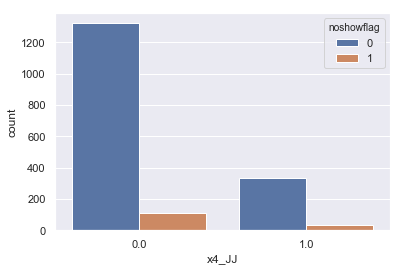

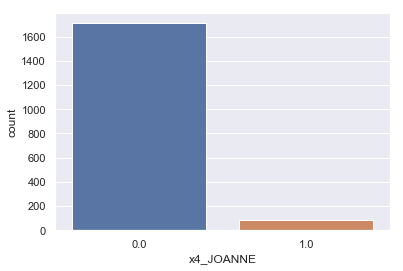

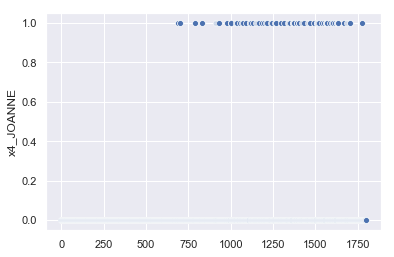

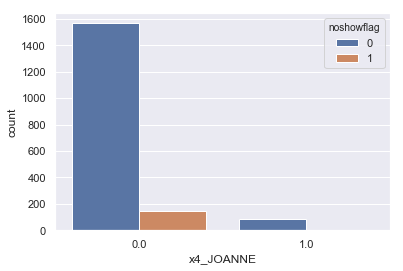

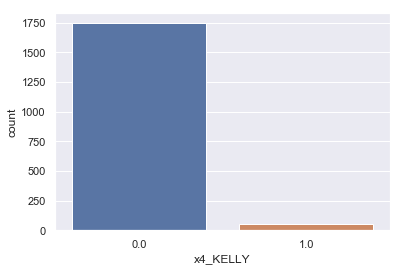

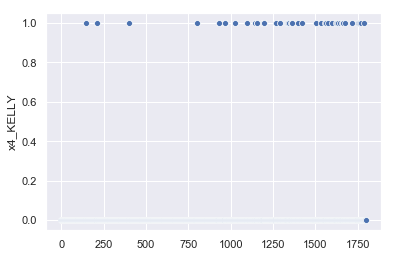

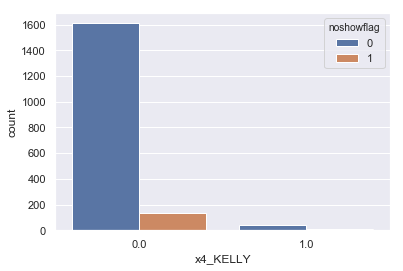

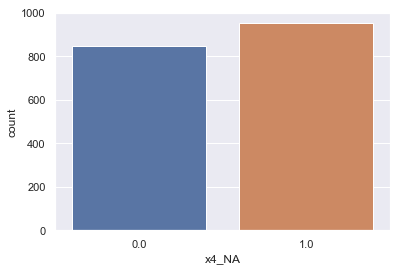

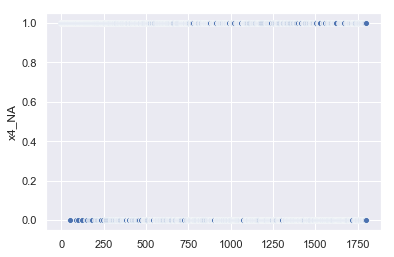

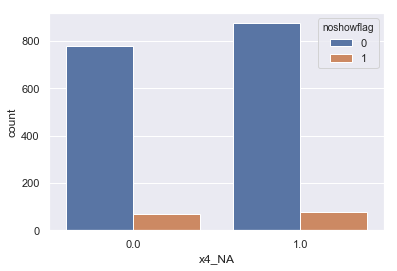

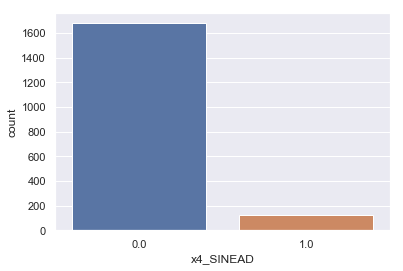

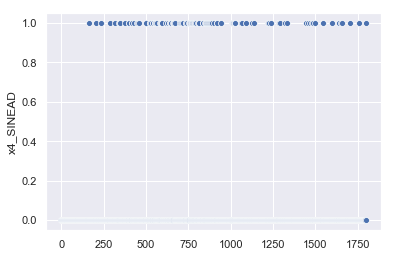

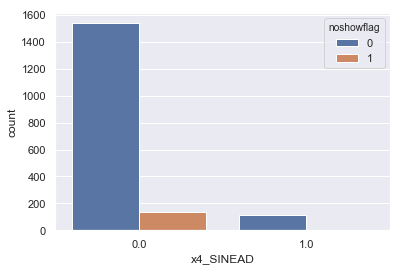

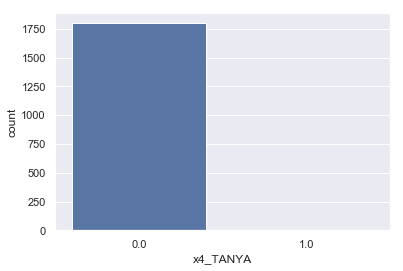

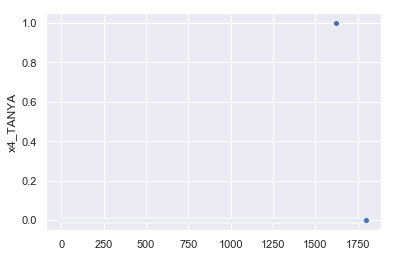

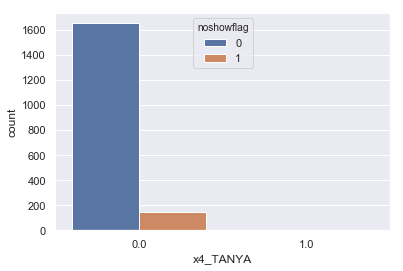

<Figure size 432x288 with 0 Axes>

In [106]:
final=booking.copy()
for c in final.columns:
    if final[c].nunique() < 3:
        final[c] = final[c].astype('category')
final.noshowflag=final.noshowflag.astype('category')
mechkar.pyMechkar().exploreData(data=final.loc[:, (final.columns != 'hour')  & (final.columns != 'lastsvcavg') & (final.columns != 'svcavg')],y='noshowflag')

In [104]:
x=final.columns.tolist()
tab1 = mechkar.pyMechkar().Table1(x=x,y="noshowflag",data=final,excel=True,excel_file="Table1_hiarsalon.xlsx")

Factorizing... please wait
[********************************************************************************************************************************************
[]
*********************************************************************************************************************************************
*********************************************************************************************************************************************


C:\Users\moshe\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\moshe\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\moshe\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


['Unable to calcualte the Fisher exact test for variables last60dnoshow and noshowflag... The p-value may be incorrect', 'Unable to calcualte the Fisher exact test for variables last60dlatecancel and noshowflag... The p-value may be incorrect']
Excel file written to Table1_hiarsalon.xlsx
------ Finished in 85.47616744041443econds -----
